In [13]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
epochs = 25

# input image dimensions
img_rows, img_cols = 28, 28



0


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 469.59it/s]


1


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:07<00:00, 426.62it/s]


2


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 459.23it/s]


3


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:08<00:00, 371.15it/s]


4


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:07<00:00, 412.74it/s]


5


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:03<00:00, 894.95it/s]


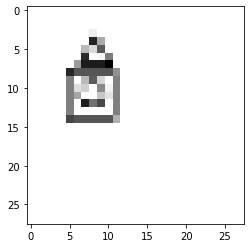

In [14]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import pandas as pd



trainxs = []
trainximgs = []
trainys = []

DATADIR = r"C:\Users\colly\Desktop\imagesFinal"

CATEGORIES = ["1_o", "2_o", "3_o", "4_o","5_o","6_o"]

#CATEGORIES = ["1","3"]


#i = [1,1,2,2,3,3]
#x =0
'''
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    
    class_num = CATEGORIES.index(category)
    #class_num = i[x]
    #x +=1
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(class_num)
          # we just want one for now so break
        break
'''

#i = [0,0,1,1,2,2]
#x =0
for x,category in enumerate(CATEGORIES):  
    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)
    #class_num = i[x]
    print(class_num)
    

    for img in tqdm(os.listdir(path)):  # iterate over each image per point value
        ig_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array 
        #ig_array = cv2.bitwise_not(ig_array)
        img_array = cv2.resize(ig_array, (28,28))
        #new_img_array = rotate(img_array, 90)
        #new_img_array1 = rotate(img_array, 180)
        #new_img_array2 = rotate(img_array, 270)

        trainys.append(class_num)
        #print(class_num)
        #trainys.append(class_num)
        #trainys.append(class_num)
        #trainys.append(class_num)
        #trainxs.append(new_img_array)
        #trainxs.append(new_img_array1)
        #trainxs.append(new_img_array2)
        trainxs.append(img_array)
    plt.imshow(img_array, cmap='gray')


            



[0. 0. 1. 0. 0. 0.]


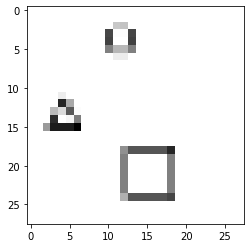

In [15]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=np.inf)

#trainys = [0 if x==1 else x for x in trainys]
#trainys = [2 if x==3 else x for x in trainys]
#trainys = [4 if x==5 else x for x in trainys]
trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.int)
#print(trainys)



x_train, x_test, y_train_old, y_test_old = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=42)
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)
#print(y_train)
plt.imshow(x_test[1], cmap='gray')
print(y_test[1])

In [16]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(14400, 28, 28, 1)

In [17]:
print('x_train shape:', x_train.shape)
x_train = np.array(x_train)
x_test = np.array(x_test)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

x_train shape: (14400, 28, 28, 1)
y_train shape: (14400, 6)
14400 train samples
3600 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
______________________

In [18]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 14400 samples, validate on 3600 samples
Epoch 1/25
14400/14400 [==============================] - ETA: 1:31 - loss: 1.7778 - accuracy: 0.18 - ETA: 1:00 - loss: 1.9884 - accuracy: 0.19 - ETA: 50s - loss: 1.9618 - accuracy: 0.1849 - ETA: 45s - loss: 1.9231 - accuracy: 0.183 - ETA: 41s - loss: 1.8971 - accuracy: 0.189 - ETA: 39s - loss: 1.8816 - accuracy: 0.188 - ETA: 37s - loss: 1.8689 - accuracy: 0.186 - ETA: 36s - loss: 1.8619 - accuracy: 0.184 - ETA: 35s - loss: 1.8558 - accuracy: 0.178 - ETA: 34s - loss: 1.8500 - accuracy: 0.172 - ETA: 33s - loss: 1.8447 - accuracy: 0.172 - ETA: 32s - loss: 1.8399 - accuracy: 0.173 - ETA: 32s - loss: 1.8366 - accuracy: 0.174 - ETA: 31s - loss: 1.8323 - accuracy: 0.180 - ETA: 30s - loss: 1.8305 - accuracy: 0.178 - ETA: 30s - loss: 1.8281 - accuracy: 0.180 - ETA: 29s - loss: 1.8261 - accuracy: 0.177 - ETA: 29s - loss: 1.8237 - accuracy: 0.178 - ETA: 28s - loss: 1.8223 - accuracy: 0.177 - ETA: 28s - loss: 1.8217 - accuracy: 0.174 - ETA: 27s - l

14400/14400 [==============================] - ETA: 34s - loss: 1.7733 - accuracy: 0.203 - ETA: 33s - loss: 1.7630 - accuracy: 0.214 - ETA: 32s - loss: 1.7593 - accuracy: 0.229 - ETA: 31s - loss: 1.7547 - accuracy: 0.224 - ETA: 31s - loss: 1.7567 - accuracy: 0.221 - ETA: 30s - loss: 1.7677 - accuracy: 0.214 - ETA: 30s - loss: 1.7696 - accuracy: 0.215 - ETA: 30s - loss: 1.7684 - accuracy: 0.220 - ETA: 30s - loss: 1.7647 - accuracy: 0.229 - ETA: 29s - loss: 1.7576 - accuracy: 0.244 - ETA: 29s - loss: 1.7601 - accuracy: 0.238 - ETA: 29s - loss: 1.7746 - accuracy: 0.235 - ETA: 28s - loss: 1.7744 - accuracy: 0.236 - ETA: 28s - loss: 1.7740 - accuracy: 0.238 - ETA: 28s - loss: 1.7723 - accuracy: 0.237 - ETA: 28s - loss: 1.7706 - accuracy: 0.237 - ETA: 27s - loss: 1.7681 - accuracy: 0.240 - ETA: 27s - loss: 1.7655 - accuracy: 0.240 - ETA: 27s - loss: 1.7624 - accuracy: 0.244 - ETA: 27s - loss: 1.7614 - accuracy: 0.246 - ETA: 27s - loss: 1.7595 - accuracy: 0.249 - ETA: 27s - loss: 1.7567 - acc

14400/14400 [==============================] - ETA: 31s - loss: 2.0136 - accuracy: 0.242 - ETA: 31s - loss: 1.8620 - accuracy: 0.234 - ETA: 30s - loss: 1.7915 - accuracy: 0.283 - ETA: 30s - loss: 1.7533 - accuracy: 0.312 - ETA: 30s - loss: 1.7350 - accuracy: 0.307 - ETA: 30s - loss: 1.7335 - accuracy: 0.291 - ETA: 30s - loss: 1.7197 - accuracy: 0.308 - ETA: 29s - loss: 1.7091 - accuracy: 0.304 - ETA: 29s - loss: 1.7086 - accuracy: 0.297 - ETA: 29s - loss: 1.7031 - accuracy: 0.296 - ETA: 28s - loss: 1.7007 - accuracy: 0.300 - ETA: 28s - loss: 1.6936 - accuracy: 0.307 - ETA: 28s - loss: 1.6863 - accuracy: 0.310 - ETA: 28s - loss: 1.6848 - accuracy: 0.313 - ETA: 27s - loss: 1.6791 - accuracy: 0.315 - ETA: 27s - loss: 1.6752 - accuracy: 0.316 - ETA: 27s - loss: 1.6700 - accuracy: 0.316 - ETA: 26s - loss: 1.6648 - accuracy: 0.316 - ETA: 26s - loss: 1.6645 - accuracy: 0.313 - ETA: 26s - loss: 1.6589 - accuracy: 0.318 - ETA: 25s - loss: 1.6530 - accuracy: 0.322 - ETA: 25s - loss: 1.6502 - acc

14400/14400 [==============================] - ETA: 29s - loss: 1.6306 - accuracy: 0.289 - ETA: 28s - loss: 1.4968 - accuracy: 0.394 - ETA: 29s - loss: 1.4503 - accuracy: 0.424 - ETA: 29s - loss: 1.4271 - accuracy: 0.427 - ETA: 29s - loss: 1.3876 - accuracy: 0.450 - ETA: 28s - loss: 1.3843 - accuracy: 0.449 - ETA: 28s - loss: 1.3648 - accuracy: 0.459 - ETA: 28s - loss: 1.3571 - accuracy: 0.465 - ETA: 28s - loss: 1.3419 - accuracy: 0.474 - ETA: 27s - loss: 1.3403 - accuracy: 0.468 - ETA: 27s - loss: 1.3473 - accuracy: 0.465 - ETA: 27s - loss: 1.3550 - accuracy: 0.457 - ETA: 27s - loss: 1.3846 - accuracy: 0.441 - ETA: 26s - loss: 1.3765 - accuracy: 0.444 - ETA: 26s - loss: 1.3725 - accuracy: 0.448 - ETA: 26s - loss: 1.3663 - accuracy: 0.451 - ETA: 26s - loss: 1.3551 - accuracy: 0.458 - ETA: 25s - loss: 1.3511 - accuracy: 0.457 - ETA: 25s - loss: 1.3407 - accuracy: 0.465 - ETA: 25s - loss: 1.3320 - accuracy: 0.467 - ETA: 25s - loss: 1.3311 - accuracy: 0.469 - ETA: 24s - loss: 1.3413 - acc

14400/14400 [==============================] - ETA: 34s - loss: 1.1439 - accuracy: 0.476 - ETA: 34s - loss: 1.1427 - accuracy: 0.464 - ETA: 34s - loss: 1.2109 - accuracy: 0.440 - ETA: 35s - loss: 1.1581 - accuracy: 0.496 - ETA: 35s - loss: 1.1443 - accuracy: 0.507 - ETA: 34s - loss: 1.1310 - accuracy: 0.509 - ETA: 33s - loss: 1.1862 - accuracy: 0.490 - ETA: 33s - loss: 1.1825 - accuracy: 0.502 - ETA: 33s - loss: 1.2018 - accuracy: 0.493 - ETA: 32s - loss: 1.2014 - accuracy: 0.493 - ETA: 32s - loss: 1.1846 - accuracy: 0.507 - ETA: 32s - loss: 1.1706 - accuracy: 0.513 - ETA: 32s - loss: 1.1581 - accuracy: 0.519 - ETA: 31s - loss: 1.1585 - accuracy: 0.519 - ETA: 31s - loss: 1.1521 - accuracy: 0.521 - ETA: 31s - loss: 1.1523 - accuracy: 0.520 - ETA: 30s - loss: 1.1552 - accuracy: 0.517 - ETA: 30s - loss: 1.1769 - accuracy: 0.510 - ETA: 30s - loss: 1.1712 - accuracy: 0.511 - ETA: 30s - loss: 1.1707 - accuracy: 0.509 - ETA: 30s - loss: 1.1763 - accuracy: 0.509 - ETA: 30s - loss: 1.1790 - acc

14400/14400 [==============================] - ETA: 29s - loss: 1.0602 - accuracy: 0.523 - ETA: 29s - loss: 0.9979 - accuracy: 0.566 - ETA: 29s - loss: 0.9849 - accuracy: 0.591 - ETA: 29s - loss: 0.9896 - accuracy: 0.585 - ETA: 28s - loss: 0.9874 - accuracy: 0.582 - ETA: 28s - loss: 0.9854 - accuracy: 0.591 - ETA: 28s - loss: 0.9765 - accuracy: 0.598 - ETA: 28s - loss: 0.9741 - accuracy: 0.601 - ETA: 27s - loss: 0.9653 - accuracy: 0.611 - ETA: 27s - loss: 0.9661 - accuracy: 0.610 - ETA: 27s - loss: 0.9598 - accuracy: 0.609 - ETA: 27s - loss: 0.9646 - accuracy: 0.604 - ETA: 26s - loss: 0.9800 - accuracy: 0.595 - ETA: 26s - loss: 0.9847 - accuracy: 0.593 - ETA: 26s - loss: 0.9792 - accuracy: 0.596 - ETA: 26s - loss: 0.9747 - accuracy: 0.597 - ETA: 25s - loss: 0.9761 - accuracy: 0.599 - ETA: 25s - loss: 0.9679 - accuracy: 0.604 - ETA: 25s - loss: 0.9666 - accuracy: 0.601 - ETA: 25s - loss: 0.9680 - accuracy: 0.600 - ETA: 25s - loss: 0.9725 - accuracy: 0.597 - ETA: 24s - loss: 1.0039 - acc

14400/14400 [==============================] - ETA: 28s - loss: 1.0773 - accuracy: 0.570 - ETA: 28s - loss: 1.2044 - accuracy: 0.523 - ETA: 28s - loss: 1.1273 - accuracy: 0.531 - ETA: 28s - loss: 1.1663 - accuracy: 0.502 - ETA: 28s - loss: 1.1137 - accuracy: 0.537 - ETA: 28s - loss: 1.0823 - accuracy: 0.550 - ETA: 27s - loss: 1.0369 - accuracy: 0.577 - ETA: 27s - loss: 1.0076 - accuracy: 0.589 - ETA: 27s - loss: 0.9880 - accuracy: 0.595 - ETA: 27s - loss: 0.9633 - accuracy: 0.610 - ETA: 26s - loss: 0.9482 - accuracy: 0.619 - ETA: 26s - loss: 0.9388 - accuracy: 0.627 - ETA: 26s - loss: 0.9327 - accuracy: 0.628 - ETA: 26s - loss: 0.9339 - accuracy: 0.628 - ETA: 25s - loss: 0.9320 - accuracy: 0.631 - ETA: 25s - loss: 0.9368 - accuracy: 0.628 - ETA: 25s - loss: 0.9319 - accuracy: 0.632 - ETA: 25s - loss: 0.9303 - accuracy: 0.631 - ETA: 25s - loss: 0.9236 - accuracy: 0.633 - ETA: 24s - loss: 0.9131 - accuracy: 0.640 - ETA: 24s - loss: 0.9095 - accuracy: 0.643 - ETA: 24s - loss: 0.9100 - acc

14400/14400 [==============================] - ETA: 29s - loss: 0.7820 - accuracy: 0.648 - ETA: 29s - loss: 0.7889 - accuracy: 0.671 - ETA: 28s - loss: 0.7740 - accuracy: 0.697 - ETA: 29s - loss: 0.7328 - accuracy: 0.724 - ETA: 28s - loss: 0.7352 - accuracy: 0.721 - ETA: 28s - loss: 0.7302 - accuracy: 0.724 - ETA: 28s - loss: 0.7337 - accuracy: 0.715 - ETA: 28s - loss: 0.7416 - accuracy: 0.709 - ETA: 27s - loss: 0.7805 - accuracy: 0.691 - ETA: 27s - loss: 0.8868 - accuracy: 0.652 - ETA: 27s - loss: 0.9244 - accuracy: 0.635 - ETA: 26s - loss: 0.9126 - accuracy: 0.638 - ETA: 27s - loss: 0.9061 - accuracy: 0.644 - ETA: 27s - loss: 0.8952 - accuracy: 0.655 - ETA: 26s - loss: 0.8876 - accuracy: 0.657 - ETA: 26s - loss: 0.8769 - accuracy: 0.663 - ETA: 26s - loss: 0.8675 - accuracy: 0.670 - ETA: 26s - loss: 0.8579 - accuracy: 0.674 - ETA: 26s - loss: 0.8543 - accuracy: 0.676 - ETA: 26s - loss: 0.8490 - accuracy: 0.678 - ETA: 26s - loss: 0.8419 - accuracy: 0.681 - ETA: 26s - loss: 0.8366 - acc

14400/14400 [==============================] - ETA: 30s - loss: 0.8487 - accuracy: 0.671 - ETA: 29s - loss: 0.7681 - accuracy: 0.695 - ETA: 29s - loss: 0.7756 - accuracy: 0.677 - ETA: 29s - loss: 0.7614 - accuracy: 0.689 - ETA: 29s - loss: 0.7382 - accuracy: 0.703 - ETA: 29s - loss: 0.7550 - accuracy: 0.694 - ETA: 28s - loss: 0.7450 - accuracy: 0.709 - ETA: 28s - loss: 0.7473 - accuracy: 0.710 - ETA: 28s - loss: 0.7368 - accuracy: 0.713 - ETA: 27s - loss: 0.7330 - accuracy: 0.716 - ETA: 27s - loss: 0.7268 - accuracy: 0.715 - ETA: 27s - loss: 0.7190 - accuracy: 0.721 - ETA: 27s - loss: 0.7139 - accuracy: 0.728 - ETA: 26s - loss: 0.7150 - accuracy: 0.724 - ETA: 26s - loss: 0.7193 - accuracy: 0.724 - ETA: 26s - loss: 0.7204 - accuracy: 0.719 - ETA: 26s - loss: 0.7167 - accuracy: 0.723 - ETA: 25s - loss: 0.7192 - accuracy: 0.721 - ETA: 25s - loss: 0.7257 - accuracy: 0.720 - ETA: 25s - loss: 0.7321 - accuracy: 0.716 - ETA: 24s - loss: 0.7542 - accuracy: 0.706 - ETA: 24s - loss: 0.7643 - acc

14400/14400 [==============================] - ETA: 30s - loss: 0.8582 - accuracy: 0.648 - ETA: 29s - loss: 0.7576 - accuracy: 0.679 - ETA: 29s - loss: 0.7402 - accuracy: 0.682 - ETA: 29s - loss: 0.7182 - accuracy: 0.685 - ETA: 29s - loss: 0.6992 - accuracy: 0.700 - ETA: 29s - loss: 0.6813 - accuracy: 0.716 - ETA: 28s - loss: 0.6608 - accuracy: 0.729 - ETA: 28s - loss: 0.6597 - accuracy: 0.733 - ETA: 28s - loss: 0.6567 - accuracy: 0.736 - ETA: 27s - loss: 0.6584 - accuracy: 0.737 - ETA: 27s - loss: 0.6677 - accuracy: 0.734 - ETA: 27s - loss: 0.6672 - accuracy: 0.735 - ETA: 27s - loss: 0.6664 - accuracy: 0.732 - ETA: 26s - loss: 0.6640 - accuracy: 0.736 - ETA: 26s - loss: 0.6672 - accuracy: 0.738 - ETA: 26s - loss: 0.6768 - accuracy: 0.732 - ETA: 26s - loss: 0.6889 - accuracy: 0.727 - ETA: 25s - loss: 0.6961 - accuracy: 0.722 - ETA: 25s - loss: 0.6960 - accuracy: 0.723 - ETA: 25s - loss: 0.7008 - accuracy: 0.718 - ETA: 25s - loss: 0.7032 - accuracy: 0.716 - ETA: 24s - loss: 0.7020 - acc

14400/14400 [==============================] - ETA: 30s - loss: 0.6562 - accuracy: 0.734 - ETA: 29s - loss: 0.6064 - accuracy: 0.757 - ETA: 29s - loss: 0.5750 - accuracy: 0.760 - ETA: 29s - loss: 0.5885 - accuracy: 0.750 - ETA: 29s - loss: 0.6131 - accuracy: 0.737 - ETA: 28s - loss: 0.6223 - accuracy: 0.743 - ETA: 28s - loss: 0.6136 - accuracy: 0.756 - ETA: 28s - loss: 0.6107 - accuracy: 0.762 - ETA: 28s - loss: 0.5950 - accuracy: 0.773 - ETA: 27s - loss: 0.5904 - accuracy: 0.773 - ETA: 27s - loss: 0.5844 - accuracy: 0.774 - ETA: 27s - loss: 0.5849 - accuracy: 0.774 - ETA: 27s - loss: 0.5794 - accuracy: 0.776 - ETA: 26s - loss: 0.5800 - accuracy: 0.778 - ETA: 26s - loss: 0.5781 - accuracy: 0.778 - ETA: 26s - loss: 0.5667 - accuracy: 0.784 - ETA: 26s - loss: 0.5660 - accuracy: 0.784 - ETA: 25s - loss: 0.5598 - accuracy: 0.787 - ETA: 25s - loss: 0.5598 - accuracy: 0.788 - ETA: 25s - loss: 0.5612 - accuracy: 0.786 - ETA: 25s - loss: 0.5589 - accuracy: 0.787 - ETA: 24s - loss: 0.5670 - acc

14400/14400 [==============================] - ETA: 34s - loss: 0.5134 - accuracy: 0.859 - ETA: 33s - loss: 0.4710 - accuracy: 0.855 - ETA: 33s - loss: 0.4608 - accuracy: 0.856 - ETA: 34s - loss: 0.4781 - accuracy: 0.837 - ETA: 35s - loss: 0.4844 - accuracy: 0.834 - ETA: 34s - loss: 0.4972 - accuracy: 0.829 - ETA: 34s - loss: 0.4876 - accuracy: 0.831 - ETA: 33s - loss: 0.4897 - accuracy: 0.828 - ETA: 33s - loss: 0.5067 - accuracy: 0.817 - ETA: 33s - loss: 0.5050 - accuracy: 0.818 - ETA: 32s - loss: 0.5059 - accuracy: 0.816 - ETA: 32s - loss: 0.5098 - accuracy: 0.810 - ETA: 32s - loss: 0.5060 - accuracy: 0.808 - ETA: 31s - loss: 0.5033 - accuracy: 0.807 - ETA: 31s - loss: 0.5056 - accuracy: 0.807 - ETA: 31s - loss: 0.5038 - accuracy: 0.809 - ETA: 30s - loss: 0.5026 - accuracy: 0.809 - ETA: 30s - loss: 0.5016 - accuracy: 0.811 - ETA: 30s - loss: 0.5000 - accuracy: 0.812 - ETA: 29s - loss: 0.4987 - accuracy: 0.813 - ETA: 29s - loss: 0.4958 - accuracy: 0.814 - ETA: 29s - loss: 0.4932 - acc

14400/14400 [==============================] - ETA: 35s - loss: 0.6236 - accuracy: 0.781 - ETA: 34s - loss: 0.5583 - accuracy: 0.796 - ETA: 33s - loss: 0.5398 - accuracy: 0.807 - ETA: 33s - loss: 0.5095 - accuracy: 0.828 - ETA: 33s - loss: 0.5079 - accuracy: 0.828 - ETA: 32s - loss: 0.4939 - accuracy: 0.835 - ETA: 32s - loss: 0.4962 - accuracy: 0.830 - ETA: 32s - loss: 0.4923 - accuracy: 0.833 - ETA: 32s - loss: 0.4847 - accuracy: 0.833 - ETA: 32s - loss: 0.4774 - accuracy: 0.835 - ETA: 31s - loss: 0.4665 - accuracy: 0.839 - ETA: 31s - loss: 0.4700 - accuracy: 0.837 - ETA: 31s - loss: 0.4652 - accuracy: 0.839 - ETA: 30s - loss: 0.4586 - accuracy: 0.844 - ETA: 30s - loss: 0.4638 - accuracy: 0.842 - ETA: 30s - loss: 0.4682 - accuracy: 0.836 - ETA: 29s - loss: 0.4688 - accuracy: 0.835 - ETA: 29s - loss: 0.4710 - accuracy: 0.830 - ETA: 29s - loss: 0.4756 - accuracy: 0.828 - ETA: 28s - loss: 0.4782 - accuracy: 0.824 - ETA: 28s - loss: 0.4799 - accuracy: 0.825 - ETA: 28s - loss: 0.4812 - acc

14400/14400 [==============================] - ETA: 38s - loss: 0.5521 - accuracy: 0.804 - ETA: 34s - loss: 0.5278 - accuracy: 0.824 - ETA: 33s - loss: 0.4857 - accuracy: 0.838 - ETA: 32s - loss: 0.4998 - accuracy: 0.837 - ETA: 32s - loss: 0.4895 - accuracy: 0.842 - ETA: 32s - loss: 0.4669 - accuracy: 0.847 - ETA: 33s - loss: 0.4567 - accuracy: 0.850 - ETA: 33s - loss: 0.4630 - accuracy: 0.839 - ETA: 32s - loss: 0.4676 - accuracy: 0.838 - ETA: 32s - loss: 0.4708 - accuracy: 0.832 - ETA: 32s - loss: 0.4666 - accuracy: 0.836 - ETA: 31s - loss: 0.4681 - accuracy: 0.832 - ETA: 31s - loss: 0.4597 - accuracy: 0.834 - ETA: 31s - loss: 0.4667 - accuracy: 0.828 - ETA: 31s - loss: 0.4805 - accuracy: 0.819 - ETA: 30s - loss: 0.5097 - accuracy: 0.807 - ETA: 30s - loss: 0.5364 - accuracy: 0.794 - ETA: 30s - loss: 0.5550 - accuracy: 0.786 - ETA: 29s - loss: 0.5923 - accuracy: 0.775 - ETA: 29s - loss: 0.5948 - accuracy: 0.775 - ETA: 29s - loss: 0.5915 - accuracy: 0.779 - ETA: 30s - loss: 0.5831 - acc

14400/14400 [==============================] - ETA: 34s - loss: 0.3439 - accuracy: 0.859 - ETA: 34s - loss: 0.4063 - accuracy: 0.820 - ETA: 34s - loss: 0.4318 - accuracy: 0.817 - ETA: 34s - loss: 0.4186 - accuracy: 0.828 - ETA: 34s - loss: 0.4159 - accuracy: 0.840 - ETA: 33s - loss: 0.4129 - accuracy: 0.847 - ETA: 33s - loss: 0.4069 - accuracy: 0.852 - ETA: 33s - loss: 0.4097 - accuracy: 0.849 - ETA: 33s - loss: 0.4143 - accuracy: 0.849 - ETA: 32s - loss: 0.4183 - accuracy: 0.846 - ETA: 32s - loss: 0.4176 - accuracy: 0.843 - ETA: 31s - loss: 0.4286 - accuracy: 0.839 - ETA: 32s - loss: 0.5097 - accuracy: 0.811 - ETA: 31s - loss: 0.5652 - accuracy: 0.790 - ETA: 32s - loss: 0.5612 - accuracy: 0.791 - ETA: 32s - loss: 0.5548 - accuracy: 0.794 - ETA: 31s - loss: 0.5482 - accuracy: 0.798 - ETA: 31s - loss: 0.5404 - accuracy: 0.800 - ETA: 30s - loss: 0.5328 - accuracy: 0.804 - ETA: 30s - loss: 0.5249 - accuracy: 0.806 - ETA: 30s - loss: 0.5274 - accuracy: 0.803 - ETA: 29s - loss: 0.5225 - acc

14400/14400 [==============================] - ETA: 33s - loss: 0.4172 - accuracy: 0.843 - ETA: 33s - loss: 0.4397 - accuracy: 0.824 - ETA: 32s - loss: 0.4354 - accuracy: 0.830 - ETA: 32s - loss: 0.4347 - accuracy: 0.839 - ETA: 31s - loss: 0.4292 - accuracy: 0.840 - ETA: 30s - loss: 0.4309 - accuracy: 0.842 - ETA: 30s - loss: 0.4399 - accuracy: 0.838 - ETA: 30s - loss: 0.4580 - accuracy: 0.832 - ETA: 29s - loss: 0.4490 - accuracy: 0.835 - ETA: 29s - loss: 0.4507 - accuracy: 0.833 - ETA: 29s - loss: 0.4587 - accuracy: 0.828 - ETA: 29s - loss: 0.4662 - accuracy: 0.824 - ETA: 29s - loss: 0.4810 - accuracy: 0.817 - ETA: 30s - loss: 0.4835 - accuracy: 0.815 - ETA: 29s - loss: 0.4776 - accuracy: 0.821 - ETA: 29s - loss: 0.4745 - accuracy: 0.824 - ETA: 29s - loss: 0.4743 - accuracy: 0.824 - ETA: 29s - loss: 0.4770 - accuracy: 0.822 - ETA: 29s - loss: 0.4774 - accuracy: 0.821 - ETA: 29s - loss: 0.4700 - accuracy: 0.824 - ETA: 28s - loss: 0.4659 - accuracy: 0.825 - ETA: 28s - loss: 0.4629 - acc

14400/14400 [==============================] - ETA: 31s - loss: 0.8813 - accuracy: 0.679 - ETA: 31s - loss: 0.6785 - accuracy: 0.753 - ETA: 31s - loss: 0.6252 - accuracy: 0.778 - ETA: 30s - loss: 0.5695 - accuracy: 0.800 - ETA: 31s - loss: 0.5221 - accuracy: 0.825 - ETA: 30s - loss: 0.5055 - accuracy: 0.829 - ETA: 30s - loss: 0.4851 - accuracy: 0.834 - ETA: 30s - loss: 0.4852 - accuracy: 0.835 - ETA: 29s - loss: 0.4794 - accuracy: 0.834 - ETA: 29s - loss: 0.4640 - accuracy: 0.840 - ETA: 29s - loss: 0.4494 - accuracy: 0.848 - ETA: 29s - loss: 0.4519 - accuracy: 0.847 - ETA: 28s - loss: 0.4434 - accuracy: 0.847 - ETA: 28s - loss: 0.4316 - accuracy: 0.852 - ETA: 28s - loss: 0.4225 - accuracy: 0.857 - ETA: 27s - loss: 0.4185 - accuracy: 0.860 - ETA: 27s - loss: 0.4194 - accuracy: 0.859 - ETA: 27s - loss: 0.4208 - accuracy: 0.857 - ETA: 26s - loss: 0.4184 - accuracy: 0.858 - ETA: 26s - loss: 0.4140 - accuracy: 0.859 - ETA: 26s - loss: 0.4100 - accuracy: 0.860 - ETA: 26s - loss: 0.4074 - acc

14400/14400 [==============================] - ETA: 31s - loss: 0.3860 - accuracy: 0.867 - ETA: 31s - loss: 0.3903 - accuracy: 0.847 - ETA: 30s - loss: 0.4025 - accuracy: 0.843 - ETA: 30s - loss: 0.3710 - accuracy: 0.857 - ETA: 29s - loss: 0.3606 - accuracy: 0.867 - ETA: 31s - loss: 0.3623 - accuracy: 0.864 - ETA: 31s - loss: 0.3654 - accuracy: 0.860 - ETA: 31s - loss: 0.3645 - accuracy: 0.864 - ETA: 31s - loss: 0.3679 - accuracy: 0.863 - ETA: 31s - loss: 0.3789 - accuracy: 0.862 - ETA: 31s - loss: 0.3715 - accuracy: 0.864 - ETA: 31s - loss: 0.3713 - accuracy: 0.865 - ETA: 30s - loss: 0.3686 - accuracy: 0.866 - ETA: 30s - loss: 0.3686 - accuracy: 0.864 - ETA: 30s - loss: 0.3605 - accuracy: 0.868 - ETA: 30s - loss: 0.3559 - accuracy: 0.869 - ETA: 30s - loss: 0.3532 - accuracy: 0.870 - ETA: 30s - loss: 0.3490 - accuracy: 0.870 - ETA: 30s - loss: 0.3489 - accuracy: 0.871 - ETA: 29s - loss: 0.3436 - accuracy: 0.873 - ETA: 29s - loss: 0.3387 - accuracy: 0.876 - ETA: 29s - loss: 0.3371 - acc

14400/14400 [==============================] - ETA: 31s - loss: 0.3488 - accuracy: 0.828 - ETA: 31s - loss: 0.3463 - accuracy: 0.851 - ETA: 30s - loss: 0.3252 - accuracy: 0.867 - ETA: 30s - loss: 0.3339 - accuracy: 0.873 - ETA: 29s - loss: 0.3175 - accuracy: 0.882 - ETA: 29s - loss: 0.3058 - accuracy: 0.888 - ETA: 29s - loss: 0.3215 - accuracy: 0.883 - ETA: 29s - loss: 0.3173 - accuracy: 0.887 - ETA: 28s - loss: 0.3101 - accuracy: 0.888 - ETA: 28s - loss: 0.3081 - accuracy: 0.889 - ETA: 28s - loss: 0.3006 - accuracy: 0.891 - ETA: 28s - loss: 0.2974 - accuracy: 0.890 - ETA: 27s - loss: 0.2989 - accuracy: 0.890 - ETA: 27s - loss: 0.3021 - accuracy: 0.887 - ETA: 27s - loss: 0.3075 - accuracy: 0.886 - ETA: 27s - loss: 0.3070 - accuracy: 0.885 - ETA: 26s - loss: 0.3049 - accuracy: 0.886 - ETA: 26s - loss: 0.3070 - accuracy: 0.884 - ETA: 26s - loss: 0.3097 - accuracy: 0.884 - ETA: 25s - loss: 0.3129 - accuracy: 0.884 - ETA: 25s - loss: 0.3287 - accuracy: 0.878 - ETA: 25s - loss: 0.3403 - acc

14400/14400 [==============================] - ETA: 30s - loss: 0.3389 - accuracy: 0.859 - ETA: 30s - loss: 0.3168 - accuracy: 0.890 - ETA: 29s - loss: 0.3057 - accuracy: 0.890 - ETA: 29s - loss: 0.3332 - accuracy: 0.890 - ETA: 29s - loss: 0.3543 - accuracy: 0.879 - ETA: 29s - loss: 0.3941 - accuracy: 0.869 - ETA: 29s - loss: 0.4398 - accuracy: 0.851 - ETA: 29s - loss: 0.4829 - accuracy: 0.831 - ETA: 28s - loss: 0.4911 - accuracy: 0.825 - ETA: 28s - loss: 0.4763 - accuracy: 0.832 - ETA: 28s - loss: 0.4571 - accuracy: 0.838 - ETA: 27s - loss: 0.4474 - accuracy: 0.843 - ETA: 27s - loss: 0.4335 - accuracy: 0.849 - ETA: 27s - loss: 0.4269 - accuracy: 0.852 - ETA: 27s - loss: 0.4203 - accuracy: 0.855 - ETA: 26s - loss: 0.4140 - accuracy: 0.856 - ETA: 26s - loss: 0.4053 - accuracy: 0.858 - ETA: 26s - loss: 0.4001 - accuracy: 0.859 - ETA: 26s - loss: 0.3943 - accuracy: 0.861 - ETA: 25s - loss: 0.3893 - accuracy: 0.862 - ETA: 25s - loss: 0.3806 - accuracy: 0.866 - ETA: 25s - loss: 0.3805 - acc

14400/14400 [==============================] - ETA: 32s - loss: 0.3839 - accuracy: 0.882 - ETA: 31s - loss: 0.3216 - accuracy: 0.890 - ETA: 30s - loss: 0.3232 - accuracy: 0.888 - ETA: 30s - loss: 0.3420 - accuracy: 0.882 - ETA: 30s - loss: 0.3364 - accuracy: 0.882 - ETA: 30s - loss: 0.3245 - accuracy: 0.890 - ETA: 31s - loss: 0.3223 - accuracy: 0.888 - ETA: 31s - loss: 0.3291 - accuracy: 0.889 - ETA: 31s - loss: 0.3285 - accuracy: 0.891 - ETA: 31s - loss: 0.3212 - accuracy: 0.894 - ETA: 30s - loss: 0.3162 - accuracy: 0.895 - ETA: 30s - loss: 0.3103 - accuracy: 0.895 - ETA: 29s - loss: 0.3021 - accuracy: 0.899 - ETA: 29s - loss: 0.3022 - accuracy: 0.901 - ETA: 28s - loss: 0.2942 - accuracy: 0.903 - ETA: 28s - loss: 0.2945 - accuracy: 0.903 - ETA: 28s - loss: 0.2923 - accuracy: 0.903 - ETA: 27s - loss: 0.2884 - accuracy: 0.904 - ETA: 27s - loss: 0.2898 - accuracy: 0.903 - ETA: 26s - loss: 0.2862 - accuracy: 0.903 - ETA: 26s - loss: 0.2875 - accuracy: 0.904 - ETA: 26s - loss: 0.2875 - acc

14400/14400 [==============================] - ETA: 36s - loss: 0.2844 - accuracy: 0.875 - ETA: 35s - loss: 0.3140 - accuracy: 0.863 - ETA: 35s - loss: 0.3198 - accuracy: 0.869 - ETA: 35s - loss: 0.2895 - accuracy: 0.878 - ETA: 35s - loss: 0.2842 - accuracy: 0.887 - ETA: 34s - loss: 0.2739 - accuracy: 0.895 - ETA: 34s - loss: 0.2693 - accuracy: 0.901 - ETA: 34s - loss: 0.2717 - accuracy: 0.901 - ETA: 33s - loss: 0.2718 - accuracy: 0.902 - ETA: 33s - loss: 0.2790 - accuracy: 0.897 - ETA: 33s - loss: 0.2802 - accuracy: 0.899 - ETA: 33s - loss: 0.2756 - accuracy: 0.901 - ETA: 32s - loss: 0.2709 - accuracy: 0.902 - ETA: 32s - loss: 0.2692 - accuracy: 0.902 - ETA: 32s - loss: 0.2665 - accuracy: 0.902 - ETA: 32s - loss: 0.2706 - accuracy: 0.901 - ETA: 31s - loss: 0.2710 - accuracy: 0.900 - ETA: 31s - loss: 0.2681 - accuracy: 0.899 - ETA: 31s - loss: 0.2684 - accuracy: 0.900 - ETA: 30s - loss: 0.2667 - accuracy: 0.900 - ETA: 30s - loss: 0.2715 - accuracy: 0.897 - ETA: 30s - loss: 0.2794 - acc

14400/14400 [==============================] - ETA: 28s - loss: 0.2494 - accuracy: 0.898 - ETA: 29s - loss: 0.2937 - accuracy: 0.878 - ETA: 29s - loss: 0.3107 - accuracy: 0.875 - ETA: 29s - loss: 0.3113 - accuracy: 0.886 - ETA: 29s - loss: 0.2957 - accuracy: 0.893 - ETA: 28s - loss: 0.2874 - accuracy: 0.898 - ETA: 29s - loss: 0.2811 - accuracy: 0.900 - ETA: 29s - loss: 0.2668 - accuracy: 0.908 - ETA: 29s - loss: 0.2661 - accuracy: 0.910 - ETA: 29s - loss: 0.2595 - accuracy: 0.912 - ETA: 30s - loss: 0.2584 - accuracy: 0.911 - ETA: 30s - loss: 0.2583 - accuracy: 0.910 - ETA: 31s - loss: 0.2617 - accuracy: 0.907 - ETA: 30s - loss: 0.2704 - accuracy: 0.902 - ETA: 30s - loss: 0.2667 - accuracy: 0.906 - ETA: 30s - loss: 0.2634 - accuracy: 0.907 - ETA: 30s - loss: 0.2636 - accuracy: 0.908 - ETA: 30s - loss: 0.2615 - accuracy: 0.908 - ETA: 29s - loss: 0.2592 - accuracy: 0.909 - ETA: 29s - loss: 0.2570 - accuracy: 0.910 - ETA: 29s - loss: 0.2542 - accuracy: 0.911 - ETA: 29s - loss: 0.2522 - acc

14400/14400 [==============================] - ETA: 31s - loss: 0.2609 - accuracy: 0.898 - ETA: 34s - loss: 0.2207 - accuracy: 0.925 - ETA: 33s - loss: 0.2403 - accuracy: 0.916 - ETA: 32s - loss: 0.2468 - accuracy: 0.908 - ETA: 31s - loss: 0.2483 - accuracy: 0.914 - ETA: 30s - loss: 0.2360 - accuracy: 0.921 - ETA: 29s - loss: 0.2294 - accuracy: 0.923 - ETA: 30s - loss: 0.2352 - accuracy: 0.920 - ETA: 29s - loss: 0.2546 - accuracy: 0.913 - ETA: 29s - loss: 0.2731 - accuracy: 0.901 - ETA: 29s - loss: 0.2760 - accuracy: 0.900 - ETA: 29s - loss: 0.2768 - accuracy: 0.901 - ETA: 28s - loss: 0.2757 - accuracy: 0.899 - ETA: 28s - loss: 0.2829 - accuracy: 0.899 - ETA: 28s - loss: 0.2855 - accuracy: 0.897 - ETA: 28s - loss: 0.2832 - accuracy: 0.898 - ETA: 27s - loss: 0.2796 - accuracy: 0.899 - ETA: 27s - loss: 0.2792 - accuracy: 0.899 - ETA: 26s - loss: 0.2800 - accuracy: 0.896 - ETA: 26s - loss: 0.2848 - accuracy: 0.895 - ETA: 26s - loss: 0.2891 - accuracy: 0.894 - ETA: 26s - loss: 0.2901 - acc

14400/14400 [==============================] - ETA: 1:15 - loss: 0.2558 - accuracy: 0.92 - ETA: 1:07 - loss: 0.2551 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2871 - accuracy: 0.90 - ETA: 1:00 - loss: 0.3143 - accuracy: 0.88 - ETA: 58s - loss: 0.3293 - accuracy: 0.8703 - ETA: 55s - loss: 0.3448 - accuracy: 0.863 - ETA: 52s - loss: 0.3388 - accuracy: 0.866 - ETA: 51s - loss: 0.3183 - accuracy: 0.877 - ETA: 50s - loss: 0.3074 - accuracy: 0.884 - ETA: 48s - loss: 0.2979 - accuracy: 0.888 - ETA: 47s - loss: 0.2923 - accuracy: 0.891 - ETA: 46s - loss: 0.2892 - accuracy: 0.893 - ETA: 45s - loss: 0.2837 - accuracy: 0.895 - ETA: 44s - loss: 0.2764 - accuracy: 0.897 - ETA: 44s - loss: 0.2713 - accuracy: 0.900 - ETA: 44s - loss: 0.2672 - accuracy: 0.902 - ETA: 44s - loss: 0.2650 - accuracy: 0.902 - ETA: 44s - loss: 0.2629 - accuracy: 0.904 - ETA: 43s - loss: 0.2575 - accuracy: 0.906 - ETA: 43s - loss: 0.2560 - accuracy: 0.907 - ETA: 43s - loss: 0.2528 - accuracy: 0.908 - ETA: 43s - loss: 0.2514 - ac

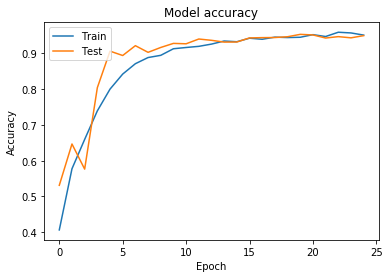

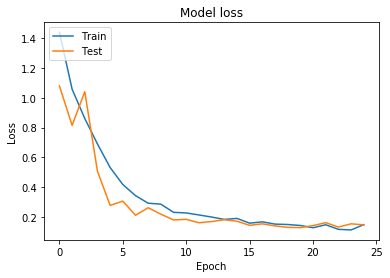

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [114]:
print("Hello world")

Hello world


In [9]:
pred = model.predict_classes(x_test)

In [ ]:
print(pred[0])

In [10]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test_old,pred)
print(cm)

[[593   0   0   0   0   0]
 [  1 546   0  64   0   0]
 [  0   0 529   0  86   0]
 [  0   1   0 603   0   1]
 [  0   0  20   1 568   7]
 [  0   0   0   0   0 580]]


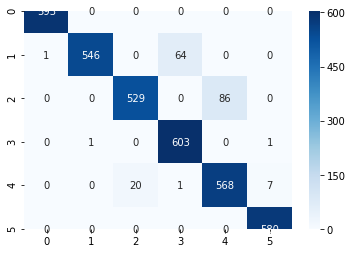

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm,annot=True,cmap='Blues', fmt='g')

In [53]:
y_test.shape

(3180, 6)

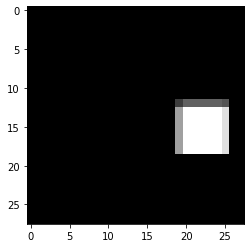

[1. 0. 0. 0. 0. 0.]
1


In [91]:
i=100

plt.imshow(test_x1[i], cmap='gray')
plt.show()
print(y_test[i])
print(pred[i] + 1)

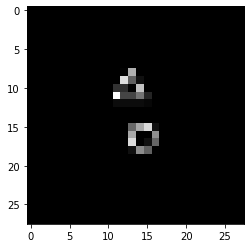

predicted:  2
actual:  4


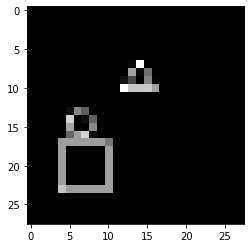

predicted:  5
actual:  3


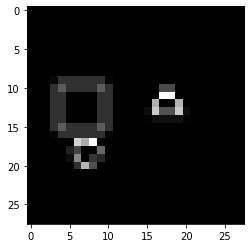

predicted:  5
actual:  3


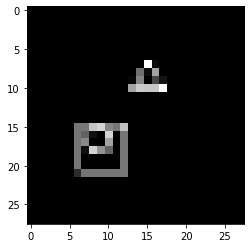

predicted:  3
actual:  5


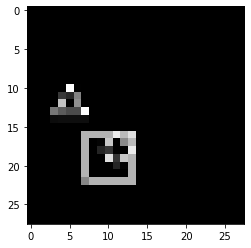

predicted:  3
actual:  5


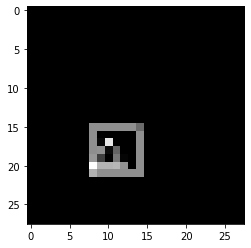

predicted:  4
actual:  2


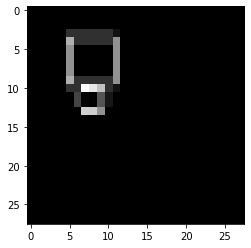

predicted:  4
actual:  2


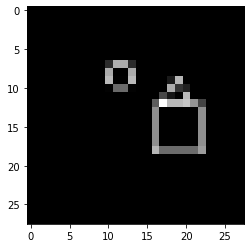

predicted:  3
actual:  5


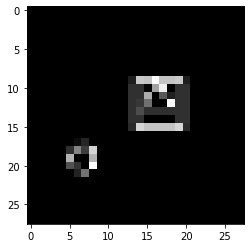

predicted:  5
actual:  3


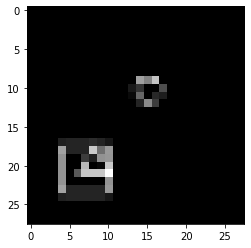

predicted:  5
actual:  3


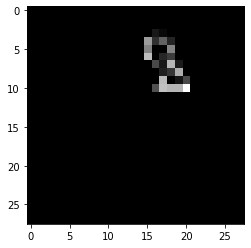

predicted:  4
actual:  2


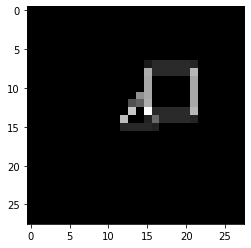

predicted:  4
actual:  2


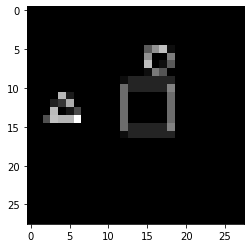

predicted:  5
actual:  3


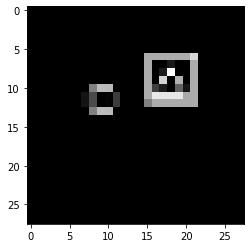

predicted:  5
actual:  3


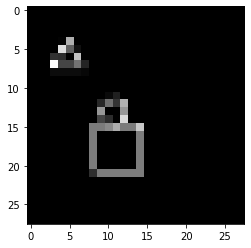

predicted:  5
actual:  3


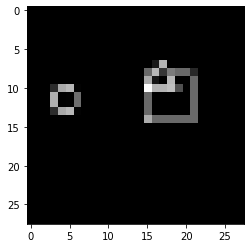

predicted:  5
actual:  3


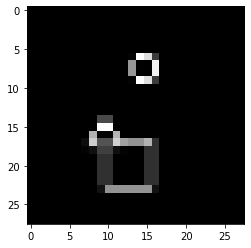

predicted:  5
actual:  3


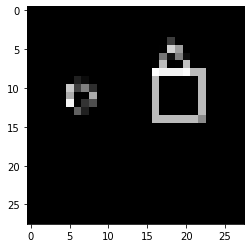

predicted:  5
actual:  3


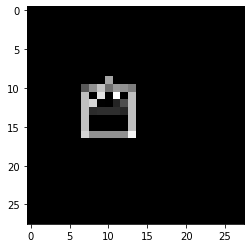

predicted:  4
actual:  2


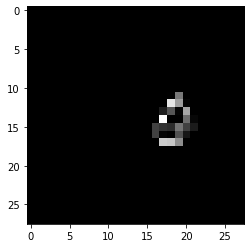

predicted:  1
actual:  2


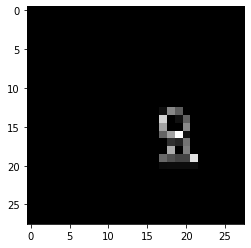

predicted:  4
actual:  2


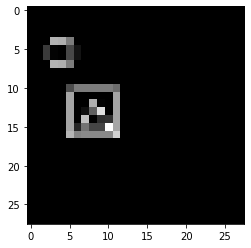

predicted:  5
actual:  3


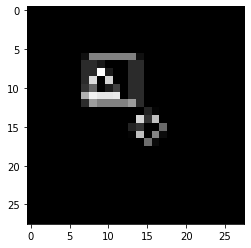

predicted:  5
actual:  3


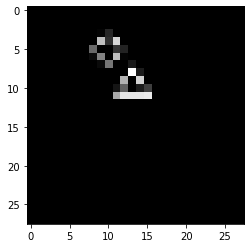

predicted:  4
actual:  2


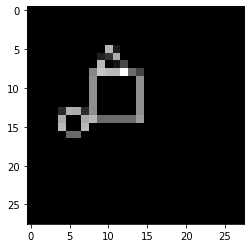

predicted:  3
actual:  5


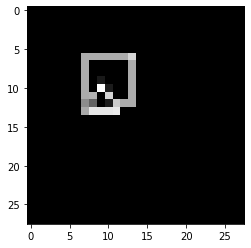

predicted:  4
actual:  2


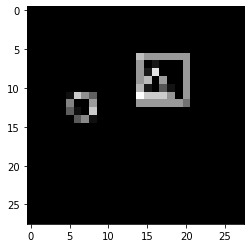

predicted:  5
actual:  3


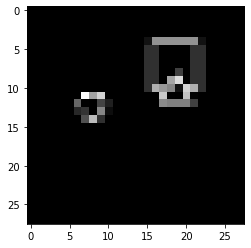

predicted:  5
actual:  3


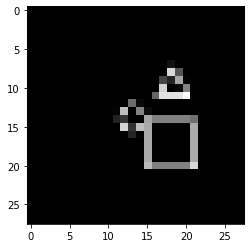

predicted:  5
actual:  3


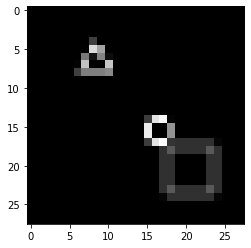

predicted:  5
actual:  3


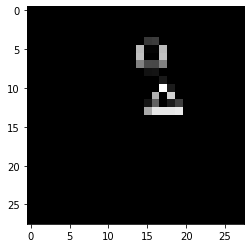

predicted:  4
actual:  2


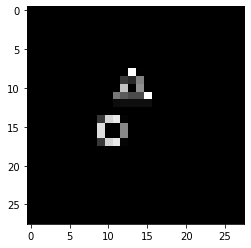

predicted:  4
actual:  2


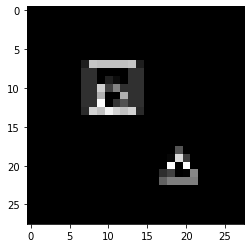

predicted:  3
actual:  5


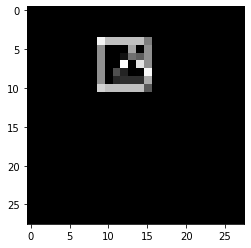

predicted:  4
actual:  2


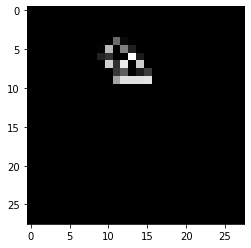

predicted:  4
actual:  2


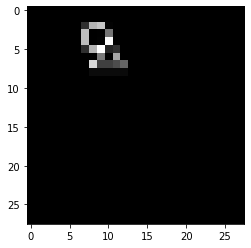

predicted:  4
actual:  2


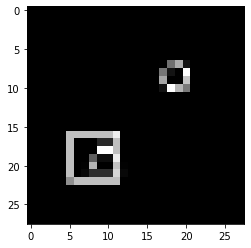

predicted:  5
actual:  3


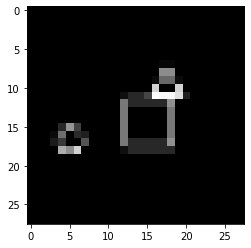

predicted:  5
actual:  3


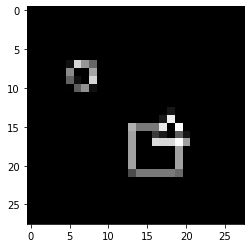

predicted:  5
actual:  3


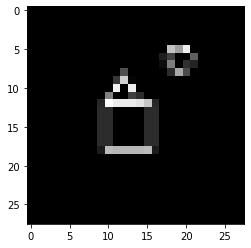

predicted:  3
actual:  5


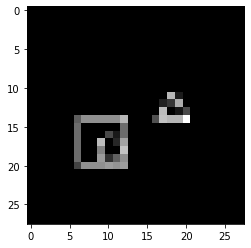

predicted:  3
actual:  5


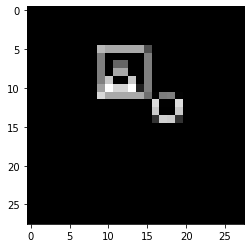

predicted:  5
actual:  3


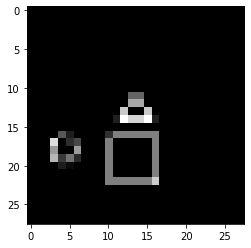

predicted:  5
actual:  3


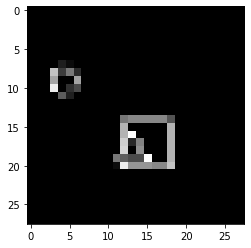

predicted:  5
actual:  3


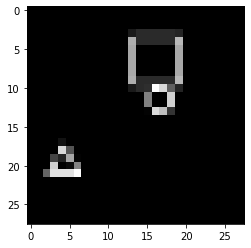

predicted:  5
actual:  3


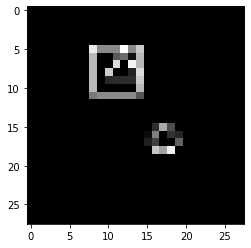

predicted:  5
actual:  3


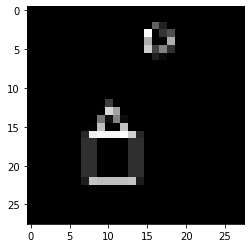

predicted:  3
actual:  5


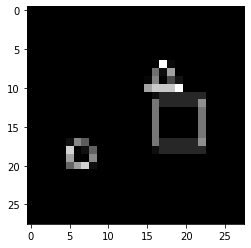

predicted:  5
actual:  3


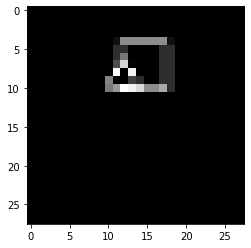

predicted:  4
actual:  2


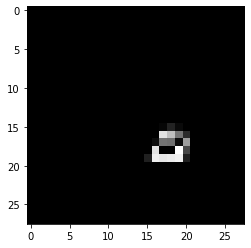

predicted:  4
actual:  2


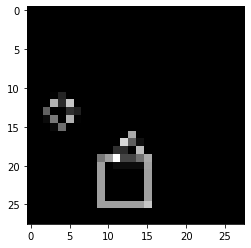

predicted:  3
actual:  5


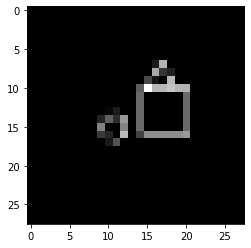

predicted:  3
actual:  5


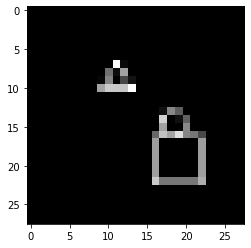

predicted:  5
actual:  3


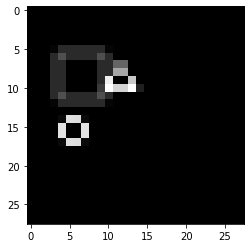

predicted:  5
actual:  3


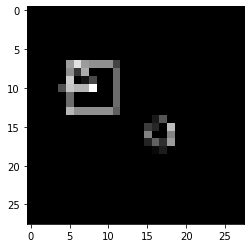

predicted:  5
actual:  3


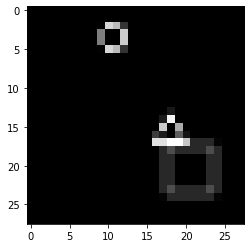

predicted:  5
actual:  3


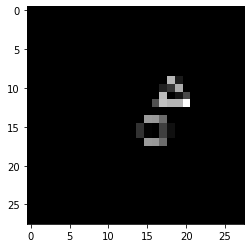

predicted:  4
actual:  2


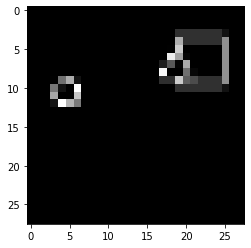

predicted:  5
actual:  3


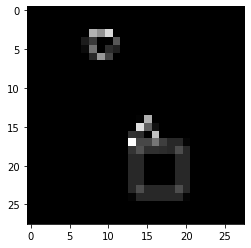

predicted:  5
actual:  3


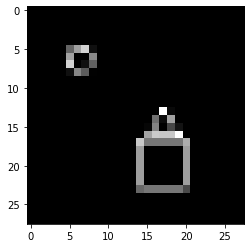

predicted:  5
actual:  3


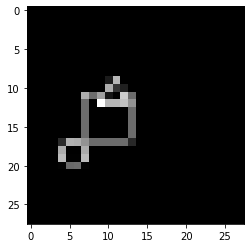

predicted:  5
actual:  3


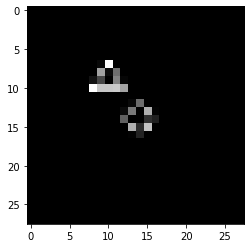

predicted:  4
actual:  2


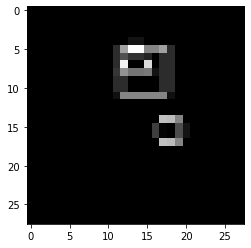

predicted:  5
actual:  3


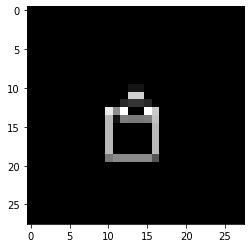

predicted:  4
actual:  2


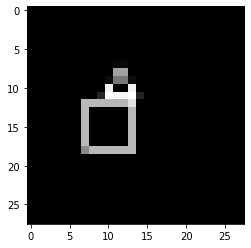

predicted:  4
actual:  2


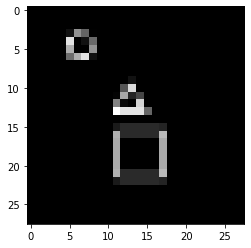

predicted:  5
actual:  3


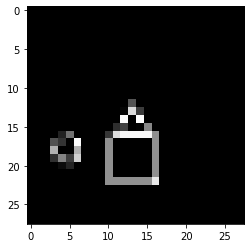

predicted:  5
actual:  3


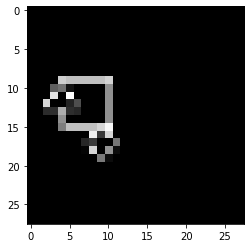

predicted:  5
actual:  3


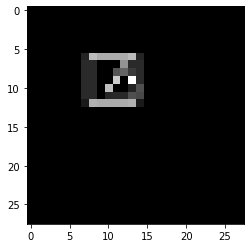

predicted:  4
actual:  2


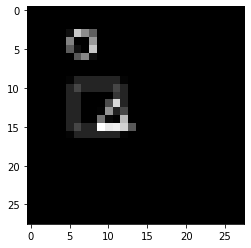

predicted:  5
actual:  3


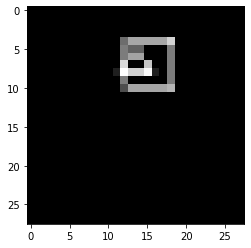

predicted:  4
actual:  2


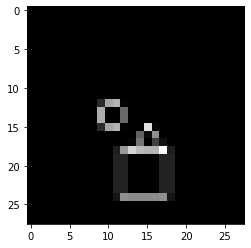

predicted:  3
actual:  5


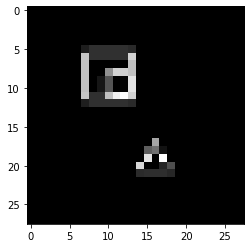

predicted:  3
actual:  5


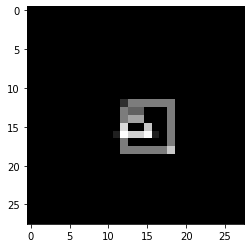

predicted:  4
actual:  2


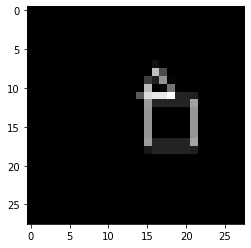

predicted:  4
actual:  2


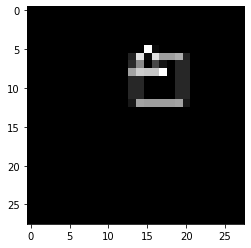

predicted:  4
actual:  2


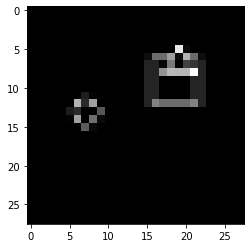

predicted:  5
actual:  3


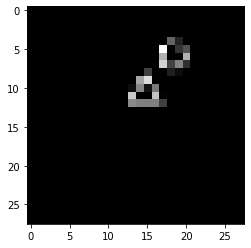

predicted:  4
actual:  2


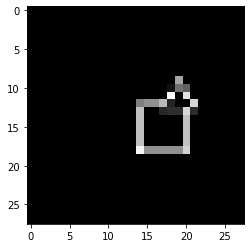

predicted:  4
actual:  2


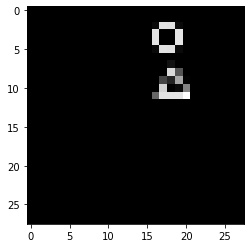

predicted:  4
actual:  2


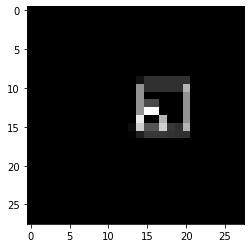

predicted:  4
actual:  2


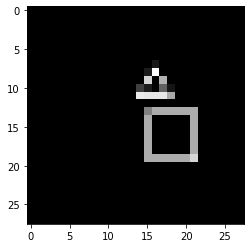

predicted:  4
actual:  2


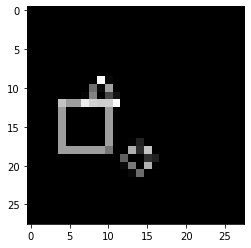

predicted:  5
actual:  3


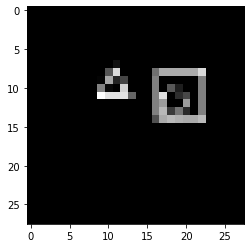

predicted:  3
actual:  5


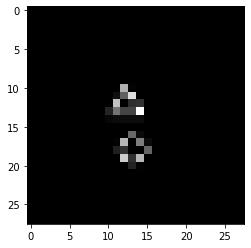

predicted:  4
actual:  2


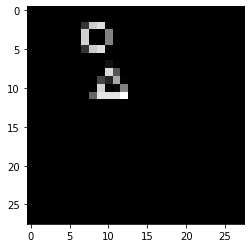

predicted:  4
actual:  2


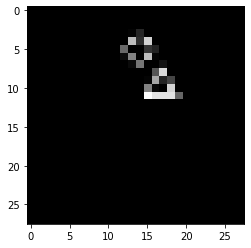

predicted:  4
actual:  2


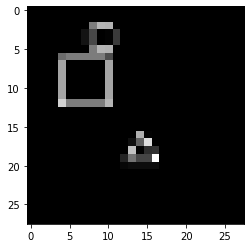

predicted:  5
actual:  3


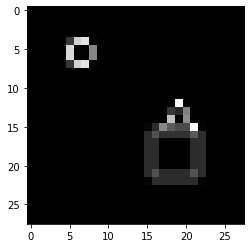

predicted:  5
actual:  3


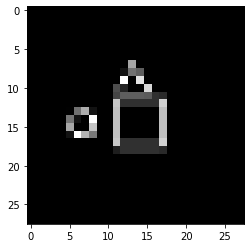

predicted:  5
actual:  3


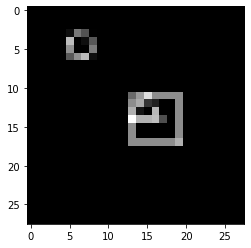

predicted:  5
actual:  3


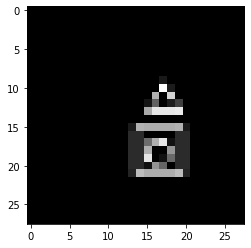

predicted:  6
actual:  5


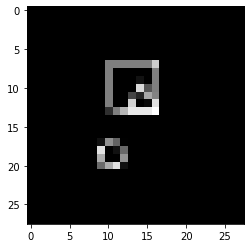

predicted:  5
actual:  3


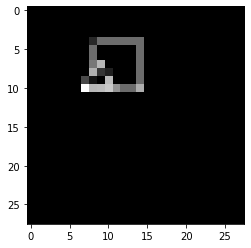

predicted:  4
actual:  2


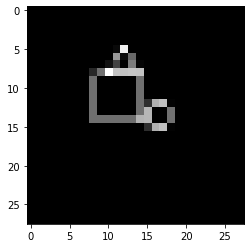

predicted:  3
actual:  5


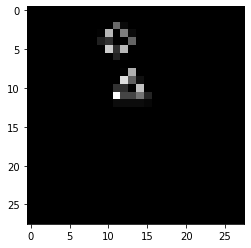

predicted:  4
actual:  2


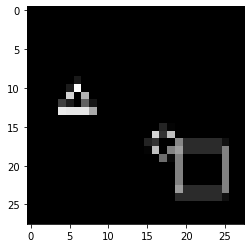

predicted:  5
actual:  3


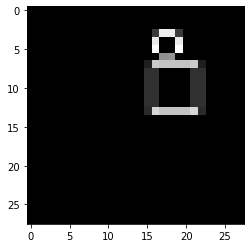

predicted:  4
actual:  2


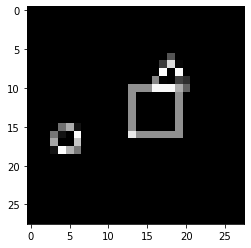

predicted:  5
actual:  3


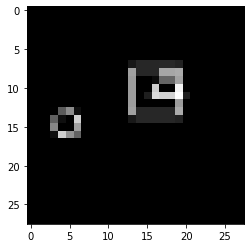

predicted:  5
actual:  3


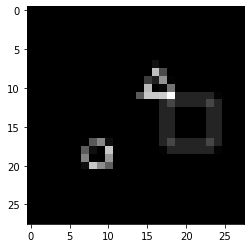

predicted:  5
actual:  3


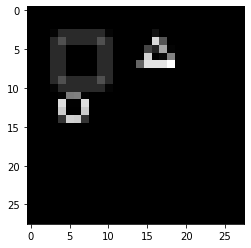

predicted:  5
actual:  3


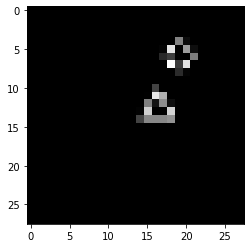

predicted:  4
actual:  2


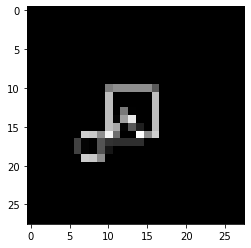

predicted:  5
actual:  3


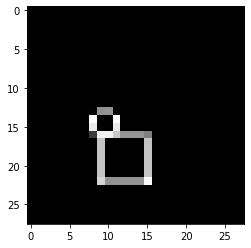

predicted:  4
actual:  2


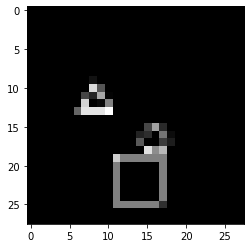

predicted:  5
actual:  3


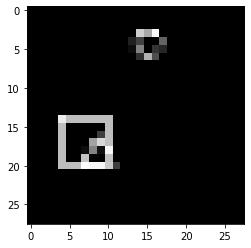

predicted:  5
actual:  3


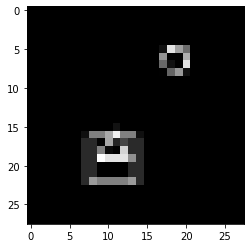

predicted:  5
actual:  3


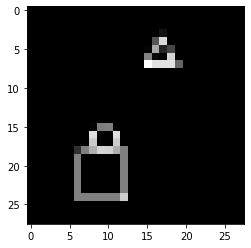

predicted:  5
actual:  3


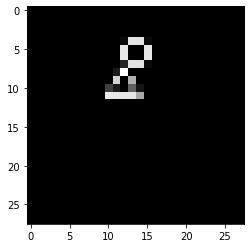

predicted:  4
actual:  2


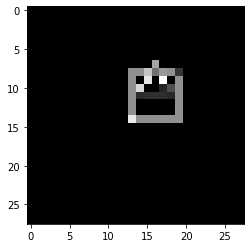

predicted:  4
actual:  2


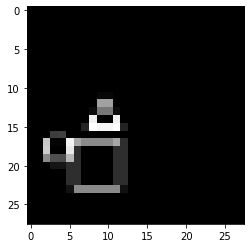

predicted:  5
actual:  3


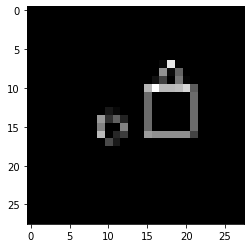

predicted:  3
actual:  5


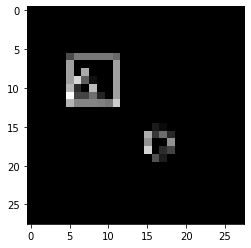

predicted:  5
actual:  3


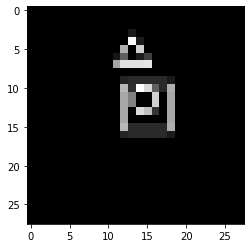

predicted:  6
actual:  5


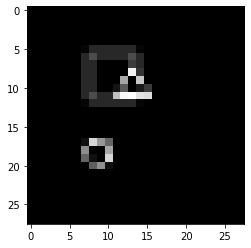

predicted:  5
actual:  3


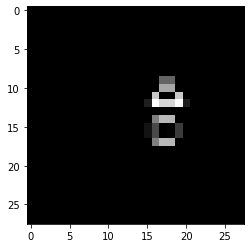

predicted:  4
actual:  2


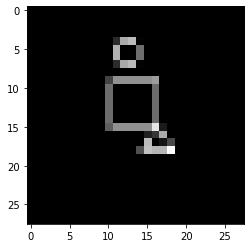

predicted:  5
actual:  3


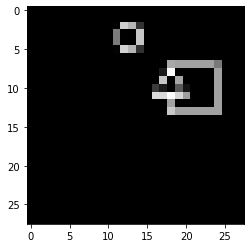

predicted:  5
actual:  3


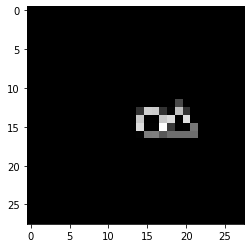

predicted:  4
actual:  2


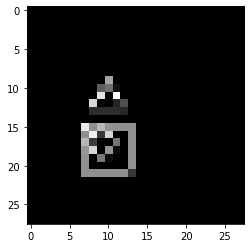

predicted:  6
actual:  5


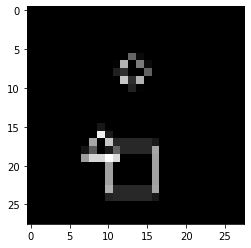

predicted:  5
actual:  3


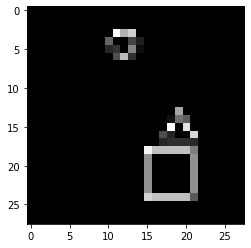

predicted:  5
actual:  3


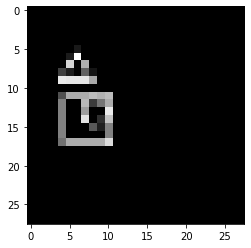

predicted:  6
actual:  5


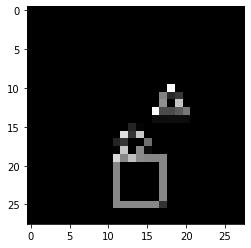

predicted:  5
actual:  3


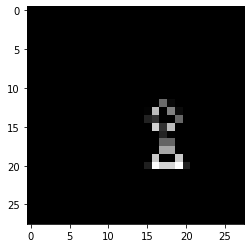

predicted:  4
actual:  2


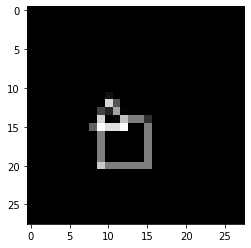

predicted:  4
actual:  2


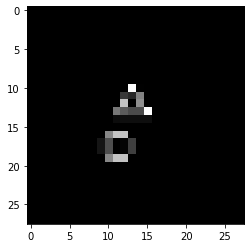

predicted:  4
actual:  2


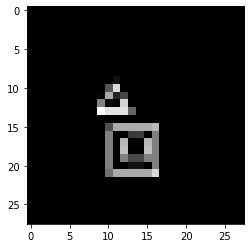

predicted:  6
actual:  5


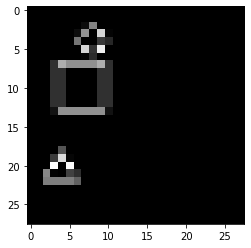

predicted:  5
actual:  3


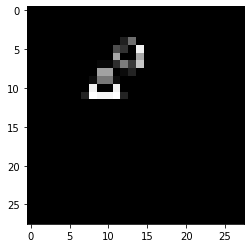

predicted:  4
actual:  2


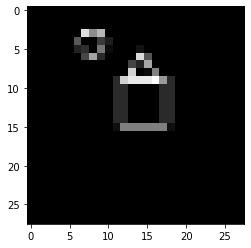

predicted:  3
actual:  5


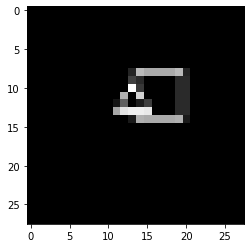

predicted:  4
actual:  2


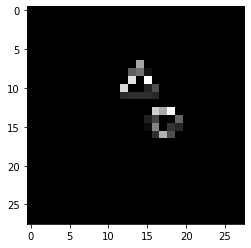

predicted:  4
actual:  2


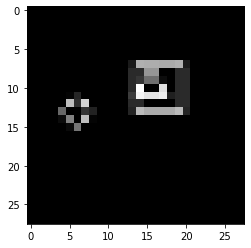

predicted:  5
actual:  3


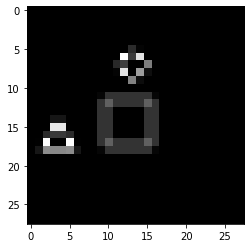

predicted:  5
actual:  3


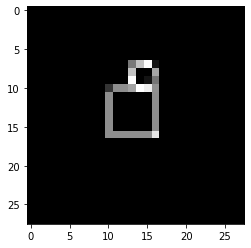

predicted:  4
actual:  2


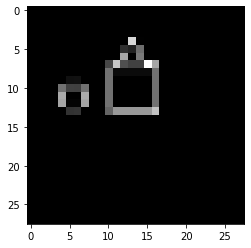

predicted:  3
actual:  5


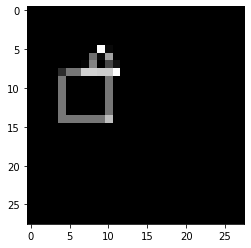

predicted:  4
actual:  2


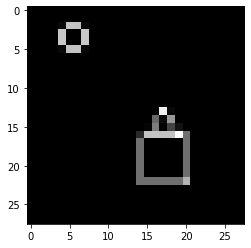

predicted:  3
actual:  5


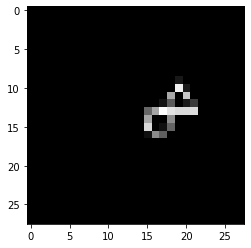

predicted:  4
actual:  2


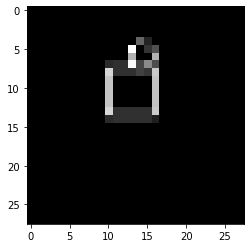

predicted:  4
actual:  2


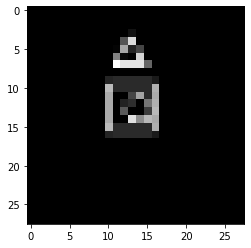

predicted:  6
actual:  5


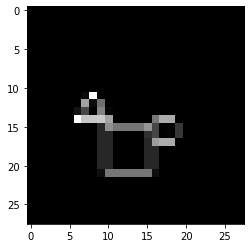

predicted:  5
actual:  3


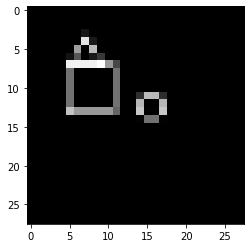

predicted:  3
actual:  5


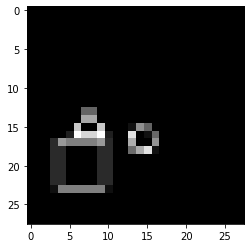

predicted:  5
actual:  3


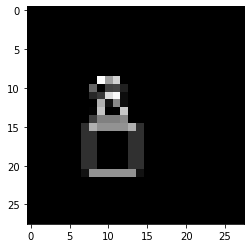

predicted:  4
actual:  5


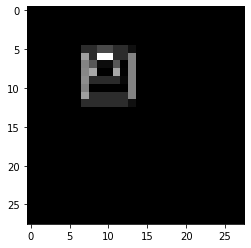

predicted:  4
actual:  2


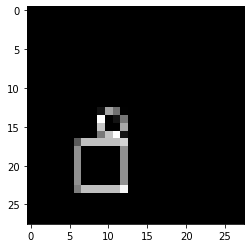

predicted:  4
actual:  2


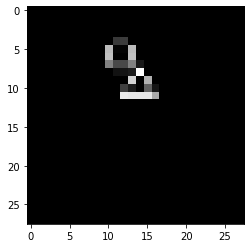

predicted:  4
actual:  2


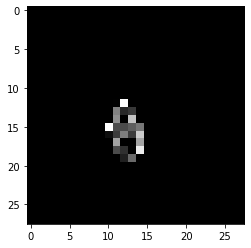

predicted:  4
actual:  2


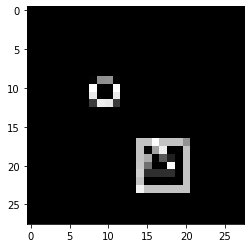

predicted:  5
actual:  3


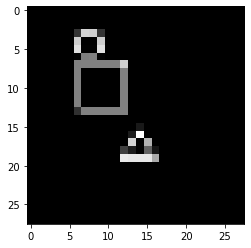

predicted:  5
actual:  3


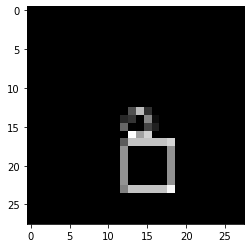

predicted:  4
actual:  2


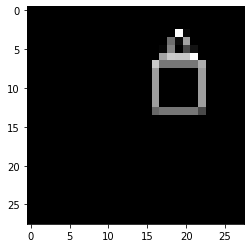

predicted:  6
actual:  4


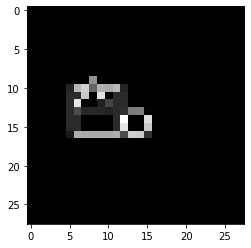

predicted:  5
actual:  3


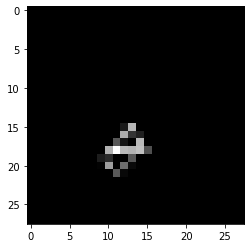

predicted:  4
actual:  2


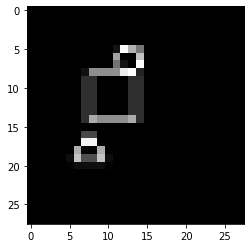

predicted:  5
actual:  3


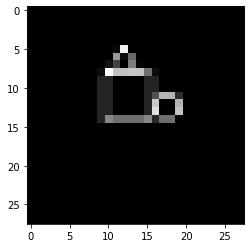

predicted:  3
actual:  5


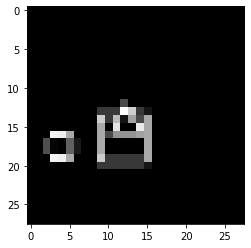

predicted:  5
actual:  3


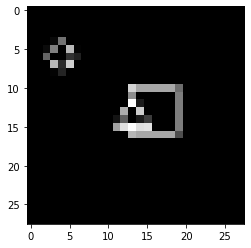

predicted:  5
actual:  3


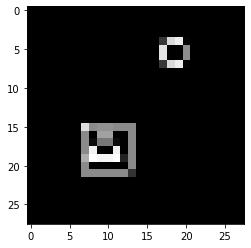

predicted:  5
actual:  3


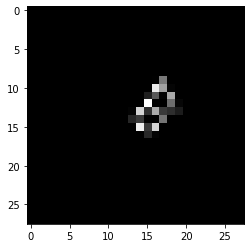

predicted:  4
actual:  2


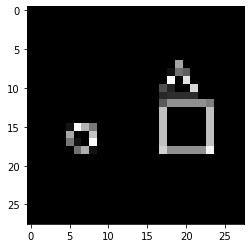

predicted:  5
actual:  3


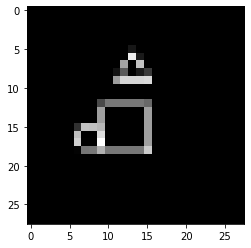

predicted:  5
actual:  3


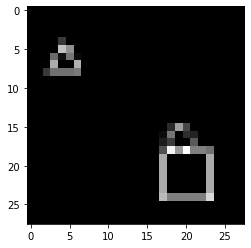

predicted:  5
actual:  3


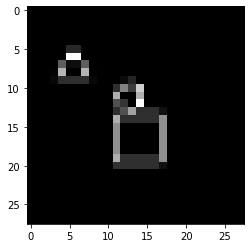

predicted:  5
actual:  3


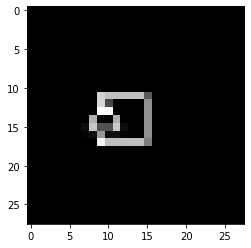

predicted:  4
actual:  2


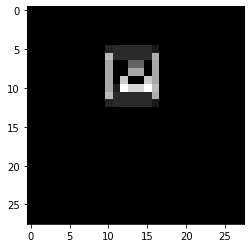

predicted:  4
actual:  2


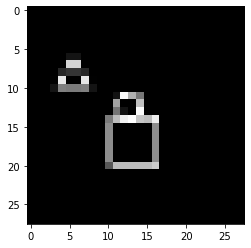

predicted:  5
actual:  3


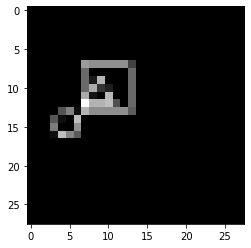

predicted:  5
actual:  3


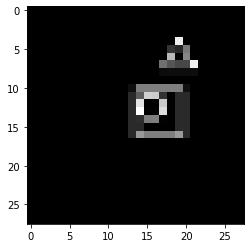

predicted:  6
actual:  5


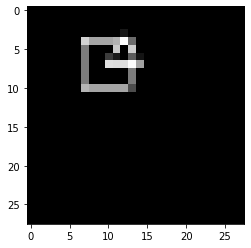

predicted:  4
actual:  2


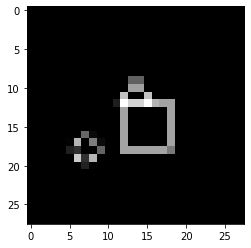

predicted:  5
actual:  3


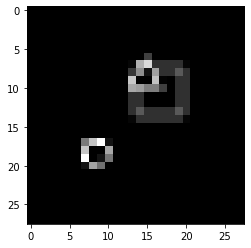

predicted:  5
actual:  3


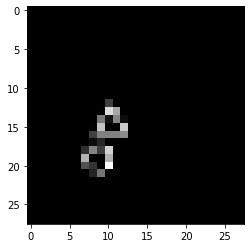

predicted:  4
actual:  2


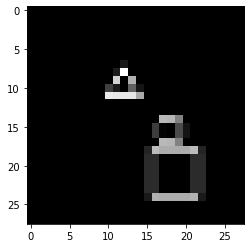

predicted:  5
actual:  3


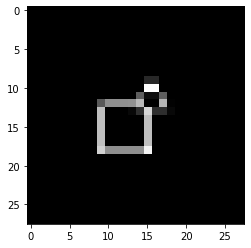

predicted:  4
actual:  2


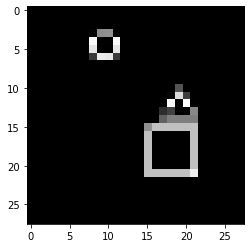

predicted:  5
actual:  3


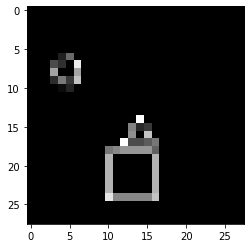

predicted:  5
actual:  3


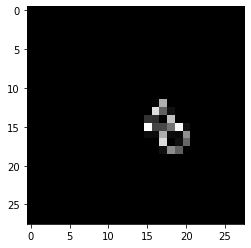

predicted:  4
actual:  2
181
0.050277777777777775


In [12]:
from numpy import argmax
x = 0
wrong = 0
test_x1 = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#hot_pred = to_categorical(pred, 6)
for i in pred:
    if pred[x] != argmax(y_test[x]):
        wrong+=1
        plt.imshow(test_x1[x], cmap='gray')
        plt.show()
        print("predicted: ",pred[x]+1)
        print("actual: ", argmax(y_test[x])+1)
    x = x+1
print(wrong)
print(wrong/x)

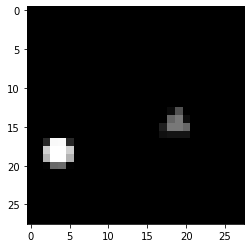

[0]
[0. 1. 0. 0. 0. 0.]


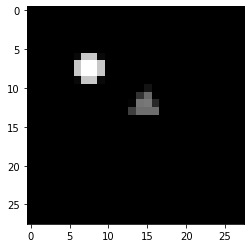

[0]
[0. 1. 0. 0. 0. 0.]


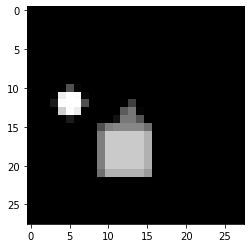

[0]
[0. 0. 0. 0. 1. 0.]


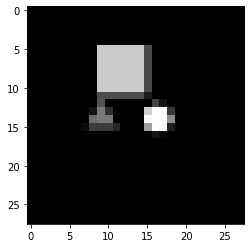

[0]
[0. 0. 1. 0. 0. 0.]


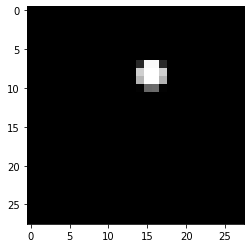

[0]
[1. 0. 0. 0. 0. 0.]


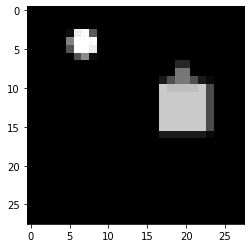

[0]
[0. 0. 0. 0. 1. 0.]


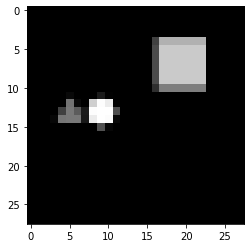

[0]
[0. 0. 1. 0. 0. 0.]


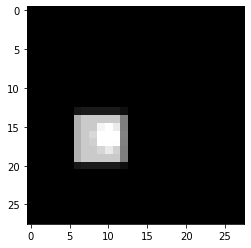

[0]
[0. 0. 0. 1. 0. 0.]


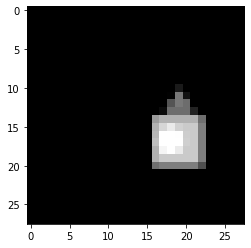

[0]
[0. 0. 0. 0. 0. 1.]


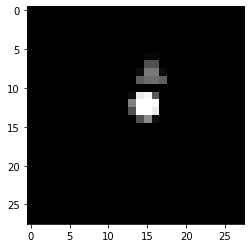

[0]
[0. 0. 0. 1. 0. 0.]


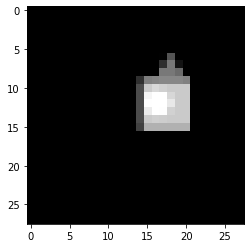

[0]
[0. 0. 0. 0. 0. 1.]


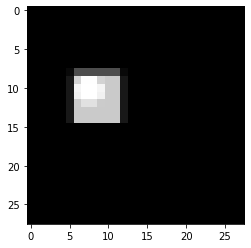

[0]
[0. 0. 0. 1. 0. 0.]


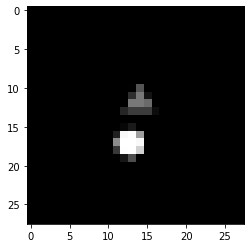

[0]
[0. 0. 0. 1. 0. 0.]


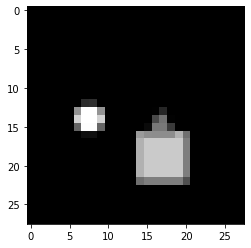

[0]
[0. 0. 0. 0. 1. 0.]


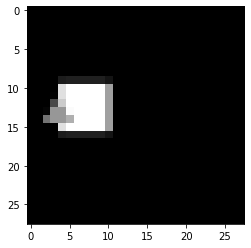

[0]
[0. 1. 0. 0. 0. 0.]


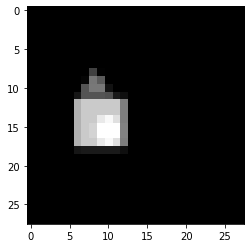

[0]
[0. 0. 0. 0. 0. 1.]


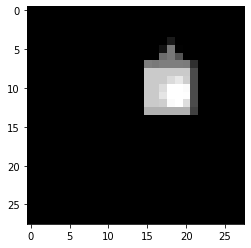

[0]
[0. 0. 0. 0. 0. 1.]


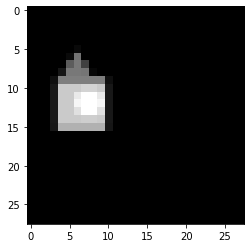

[0]
[0. 0. 0. 0. 0. 1.]


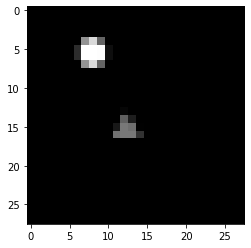

[0]
[0. 1. 0. 0. 0. 0.]


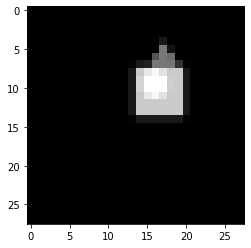

[0]
[0. 0. 0. 0. 0. 1.]


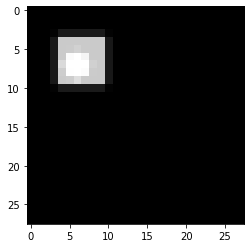

[0]
[0. 0. 0. 1. 0. 0.]


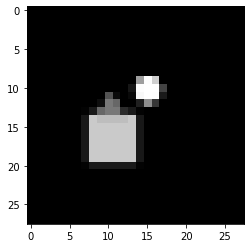

[0]
[0. 0. 0. 0. 1. 0.]


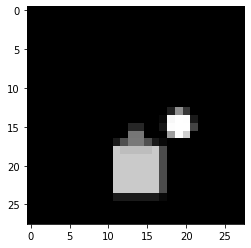

[0]
[0. 0. 0. 0. 1. 0.]


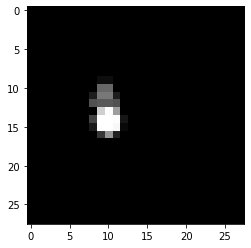

[0]
[0. 0. 0. 1. 0. 0.]


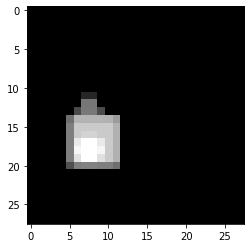

[0]
[0. 0. 0. 0. 0. 1.]


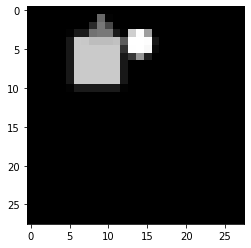

[0]
[0. 0. 0. 0. 1. 0.]


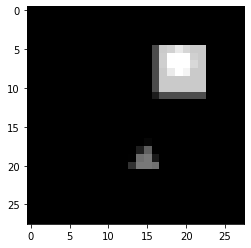

[0]
[0. 0. 0. 0. 1. 0.]


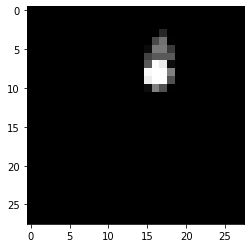

[0]
[0. 0. 0. 1. 0. 0.]


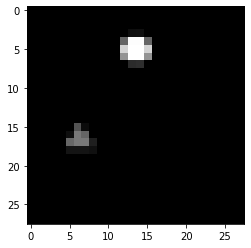

[0]
[0. 1. 0. 0. 0. 0.]


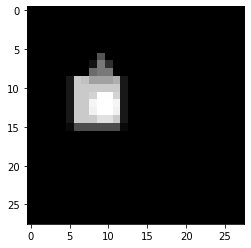

[0]
[0. 0. 0. 0. 0. 1.]


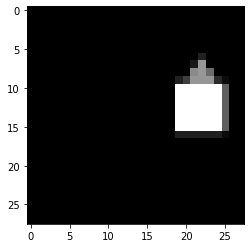

[0]
[0. 0. 0. 1. 0. 0.]


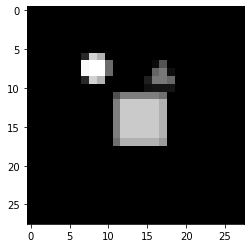

[0]
[0. 0. 1. 0. 0. 0.]


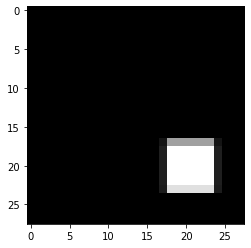

[0]
[1. 0. 0. 0. 0. 0.]


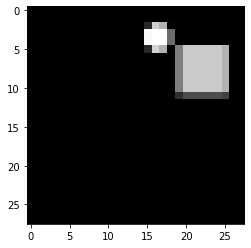

[0]
[0. 1. 0. 0. 0. 0.]


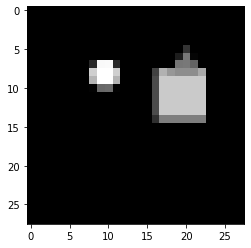

[0]
[0. 0. 0. 0. 1. 0.]


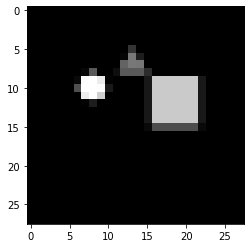

[0]
[0. 0. 1. 0. 0. 0.]


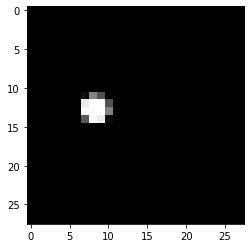

[0]
[1. 0. 0. 0. 0. 0.]


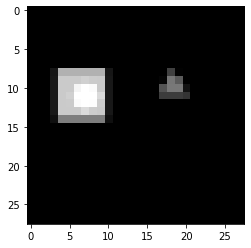

[0]
[0. 0. 0. 0. 1. 0.]


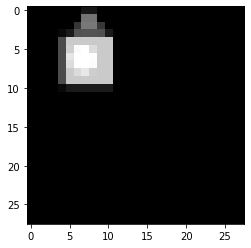

[0]
[0. 0. 0. 0. 0. 1.]


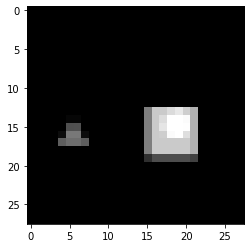

[0]
[0. 0. 0. 0. 1. 0.]


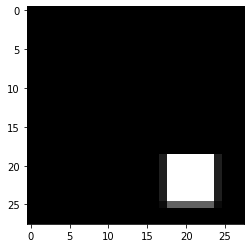

[0]
[1. 0. 0. 0. 0. 0.]


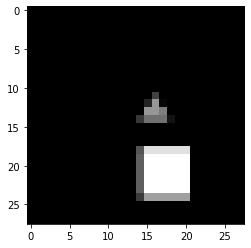

[0]
[0. 1. 0. 0. 0. 0.]


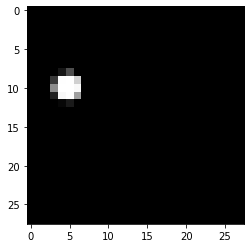

[0]
[1. 0. 0. 0. 0. 0.]


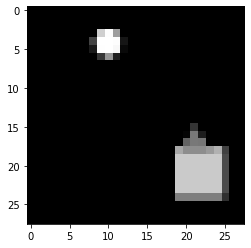

[0]
[0. 0. 0. 0. 1. 0.]


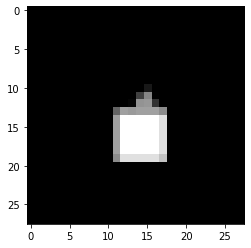

[0]
[0. 0. 0. 1. 0. 0.]


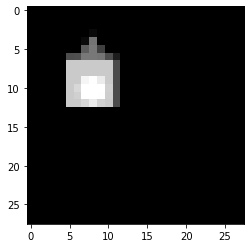

[0]
[0. 0. 0. 0. 0. 1.]


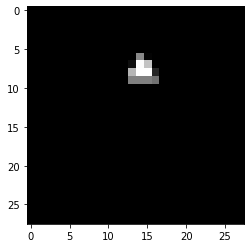

[0]
[1. 0. 0. 0. 0. 0.]


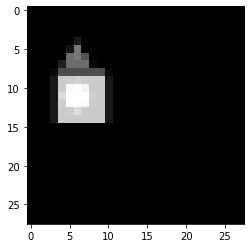

[0]
[0. 0. 0. 0. 0. 1.]


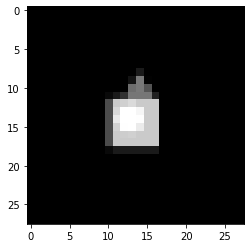

[0]
[0. 0. 0. 0. 0. 1.]


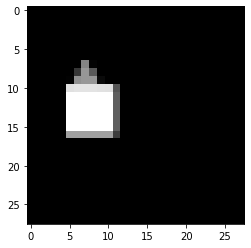

[0]
[0. 0. 0. 1. 0. 0.]


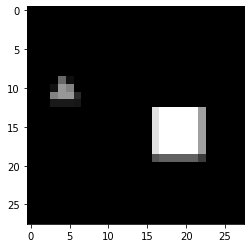

[0]
[0. 1. 0. 0. 0. 0.]


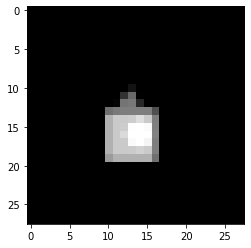

[0]
[0. 0. 0. 0. 0. 1.]


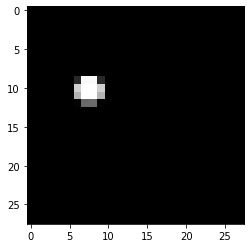

[0]
[1. 0. 0. 0. 0. 0.]


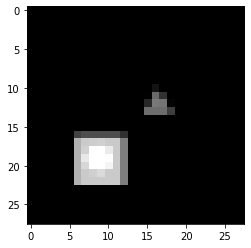

[0]
[0. 0. 0. 0. 1. 0.]


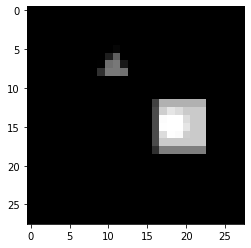

[0]
[0. 0. 0. 0. 1. 0.]


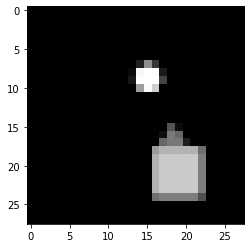

[0]
[0. 0. 0. 0. 1. 0.]


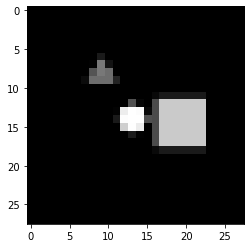

[0]
[0. 0. 1. 0. 0. 0.]


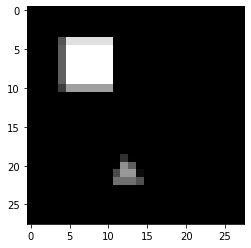

[0]
[0. 1. 0. 0. 0. 0.]


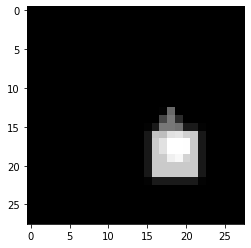

[0]
[0. 0. 0. 0. 0. 1.]


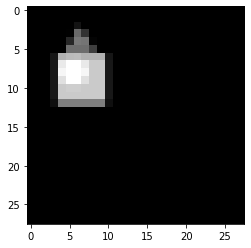

[0]
[0. 0. 0. 0. 0. 1.]


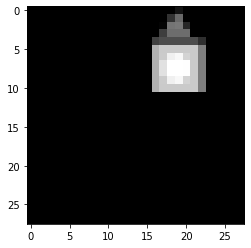

[0]
[0. 0. 0. 0. 0. 1.]


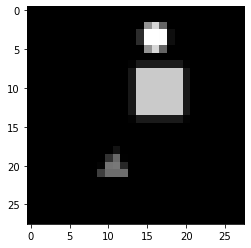

[0]
[0. 0. 1. 0. 0. 0.]


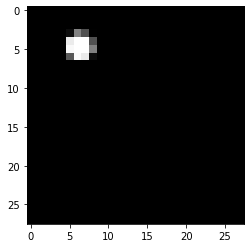

[0]
[1. 0. 0. 0. 0. 0.]


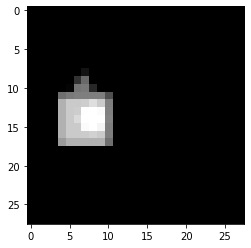

[0]
[0. 0. 0. 0. 0. 1.]


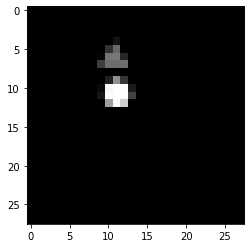

[0]
[0. 0. 0. 1. 0. 0.]


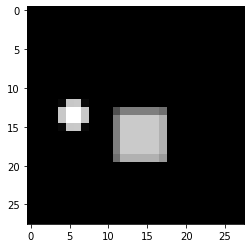

[0]
[0. 1. 0. 0. 0. 0.]


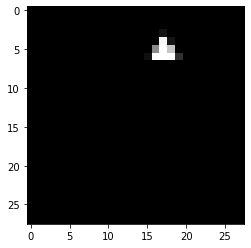

[0]
[1. 0. 0. 0. 0. 0.]


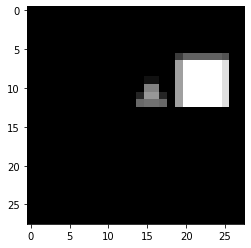

[0]
[0. 1. 0. 0. 0. 0.]


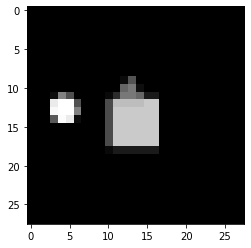

[0]
[0. 0. 0. 0. 1. 0.]


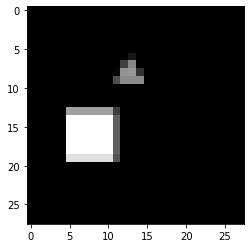

[0]
[0. 1. 0. 0. 0. 0.]


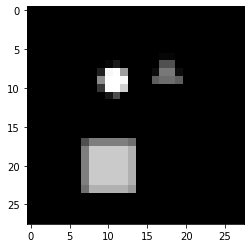

[0]
[0. 0. 1. 0. 0. 0.]


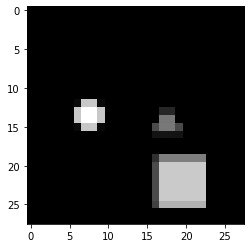

[0]
[0. 0. 1. 0. 0. 0.]


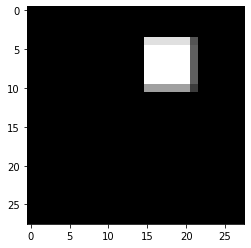

[0]
[1. 0. 0. 0. 0. 0.]


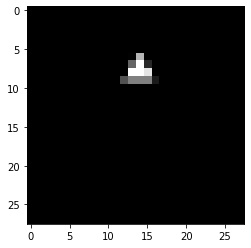

[0]
[1. 0. 0. 0. 0. 0.]


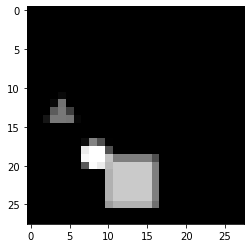

[0]
[0. 0. 1. 0. 0. 0.]


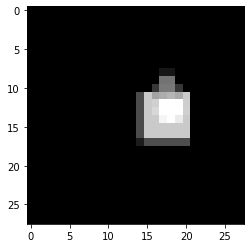

[0]
[0. 0. 0. 0. 0. 1.]


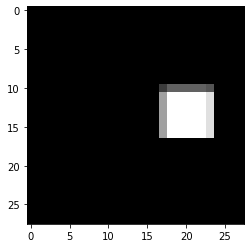

[0]
[1. 0. 0. 0. 0. 0.]


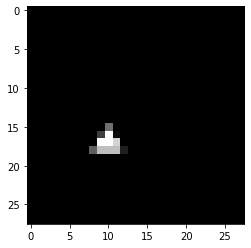

[0]
[1. 0. 0. 0. 0. 0.]


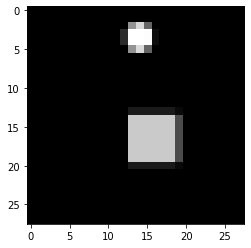

[0]
[0. 1. 0. 0. 0. 0.]


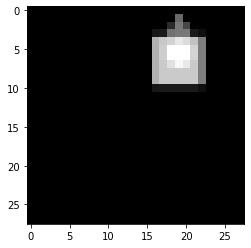

[0]
[0. 0. 0. 0. 0. 1.]


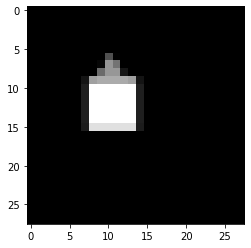

[0]
[0. 0. 0. 1. 0. 0.]


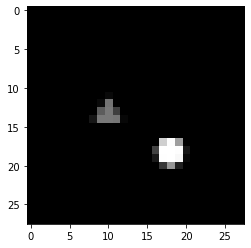

[0]
[0. 1. 0. 0. 0. 0.]


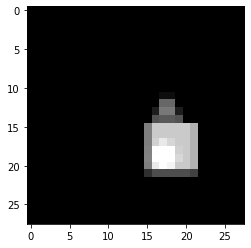

[0]
[0. 0. 0. 0. 0. 1.]


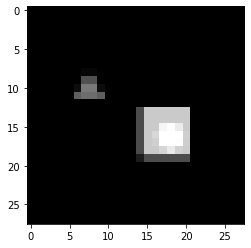

[0]
[0. 0. 0. 0. 1. 0.]


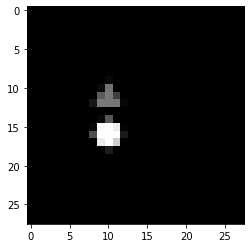

[0]
[0. 0. 0. 1. 0. 0.]


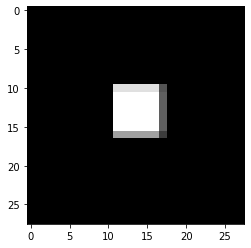

[0]
[1. 0. 0. 0. 0. 0.]


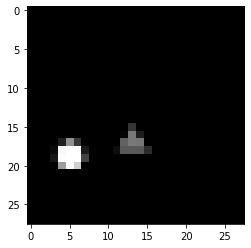

[0]
[0. 1. 0. 0. 0. 0.]


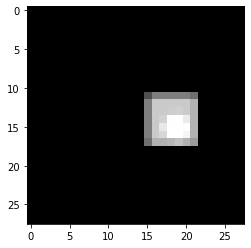

[0]
[0. 0. 0. 1. 0. 0.]


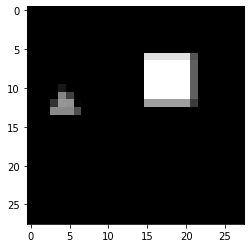

[0]
[0. 1. 0. 0. 0. 0.]


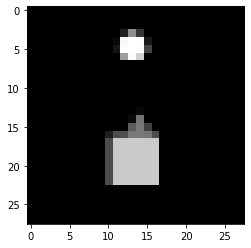

[0]
[0. 0. 0. 0. 1. 0.]


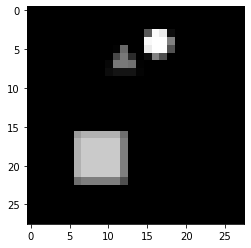

[0]
[0. 0. 1. 0. 0. 0.]


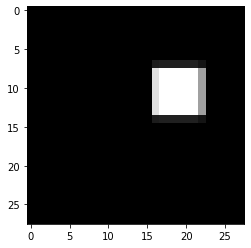

[0]
[1. 0. 0. 0. 0. 0.]


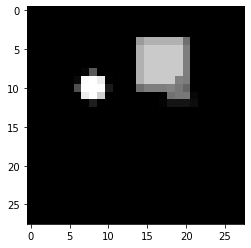

[0]
[0. 0. 1. 0. 0. 0.]


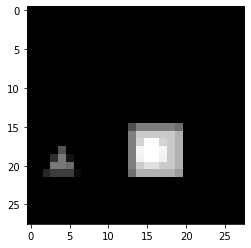

[0]
[0. 0. 0. 0. 1. 0.]


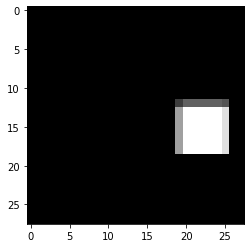

[0]
[1. 0. 0. 0. 0. 0.]


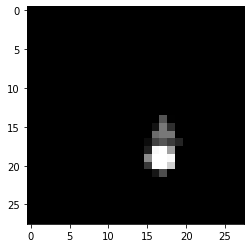

[0]
[0. 0. 0. 1. 0. 0.]


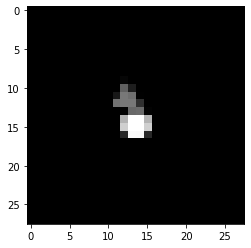

[0]
[0. 0. 0. 1. 0. 0.]


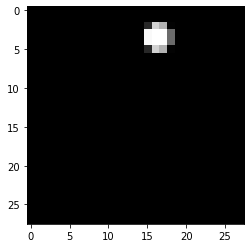

[0]
[1. 0. 0. 0. 0. 0.]


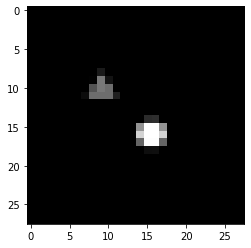

[0]
[0. 1. 0. 0. 0. 0.]


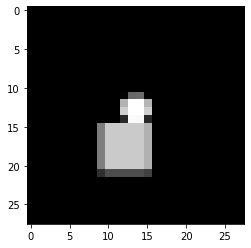

[0]
[0. 1. 0. 0. 0. 0.]


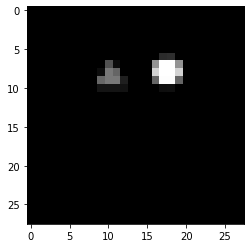

[0]
[0. 1. 0. 0. 0. 0.]


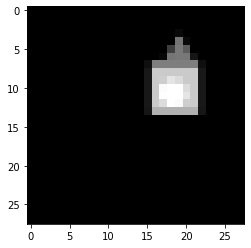

[0]
[0. 0. 0. 0. 0. 1.]


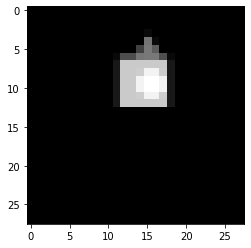

[0]
[0. 0. 0. 0. 0. 1.]


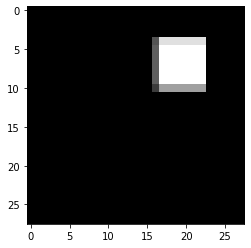

[0]
[1. 0. 0. 0. 0. 0.]


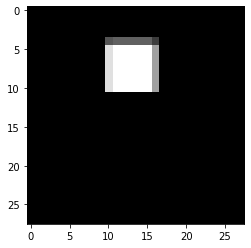

[0]
[1. 0. 0. 0. 0. 0.]


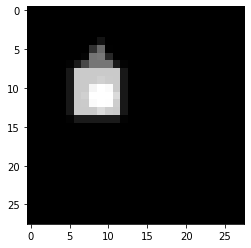

[0]
[0. 0. 0. 0. 0. 1.]


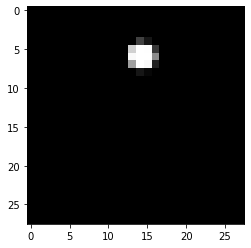

[0]
[1. 0. 0. 0. 0. 0.]


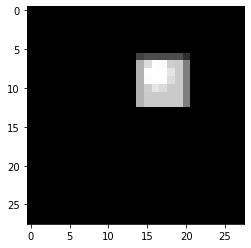

[0]
[0. 0. 0. 1. 0. 0.]


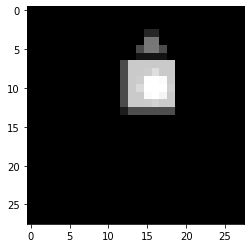

[0]
[0. 0. 0. 0. 0. 1.]


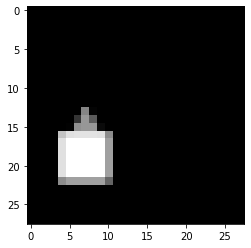

[0]
[0. 0. 0. 1. 0. 0.]


KeyboardInterrupt: 

In [66]:
def load_image(img_tensor, show=False):
    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=2)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

test_x1 = x_test.reshape(x_test.shape[0], img_rows, img_cols)

for i in y_test:
    x+=1
    test = x
    pred_test = test_x1[test]


    plt.imshow(pred_test, cmap='gray')
    plt.show()

    new_image = load_image(pred_test)


    pred1 = model.predict_classes(np.array( [new_image,] ))

    print(pred1)
    print(y_test[test])


In [ ]:
x_test.shape